<h1> Group 20 - DMML Coursework 2 - RandomForest<h1>
    
<hr>

<h3> Data <h3> 

In [225]:
#Specify Imports

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

<h4> Training Data <h4>

In [184]:
#read in data from csv 
training_Data = pd.read_csv("For_10_Fold_Cross_Validation.csv")

#look at shape
training_Data.shape 

#look at data format
training_Data.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,Class
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,31.0,28.0,25.0,22.0,22.0,25.0,26.0,25.0,25.0,four
1,26.0,27.0,28.0,27.0,27.0,24.0,13.0,12.0,21.0,84.0,...,24.0,52.0,77.0,94.0,96.0,96.0,93.0,91.0,89.0,eight
2,149.0,110.0,68.0,55.0,54.0,55.0,45.0,36.0,31.0,35.0,...,149.0,96.0,52.0,54.0,68.0,87.0,110.0,104.0,92.0,two
3,73.0,80.0,86.0,97.0,113.0,120.0,118.0,84.0,56.0,46.0,...,98.0,99.0,100.0,101.0,99.0,98.0,100.0,106.0,114.0,one
4,62.0,58.0,57.0,57.0,57.0,58.0,58.0,54.0,52.0,50.0,...,30.0,29.0,28.0,26.0,25.0,27.0,28.0,28.0,31.0,three


In [185]:
#define the data to be used as all but the class attribute from the data 
X_Train = training_Data.drop('Class', axis = 1)

#define the expexted value to be the class column of the input data 
y_train = training_Data['Class']

Scale data

In [186]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_Train)

<h4> Test Data <h4>

In [187]:
testData = pd.read_csv ('Test_Dataset.csv')

X_Test = testData.drop('Class', axis = 1)
y_test = testData['Class']


X_test = sc.fit_transform(X_Test)

<h4> 4000 Split <h4>

In [188]:
#Read in data
testData_with4000 = pd.read_csv ('testData_4000Split.csv')
data_split5690 = pd.read_csv ('trainData_5690Split.csv')

In [189]:
#setup training data
X_Train_4000Split = data_split5690.drop('Class', axis = 1)
y_train_4000Split = data_split5690['Class']


#setup test data
X_Test_4000Split = testData_with4000.drop('Class', axis = 1)
y_test_4000Split = testData_with4000['Class']



sc = StandardScaler()
X_train_4000Split = sc.fit_transform(X_Train_4000Split)
X_test_4000Split = sc.fit_transform(X_Test_4000Split)

<h4>9000 Split<h4>

In [190]:
#Read in data
testData_with9000 = pd.read_csv ('testData_9000Split.csv')
data_split690 = pd.read_csv ('trainData_690Split.csv')

In [191]:
#setup training data
X_Train_9000Split = data_split690.drop('Class', axis = 1)
y_train_9000Split = data_split690['Class']


#setup test data
X_Test_9000Split = testData_with9000.drop('Class', axis = 1)
y_test_9000Split = testData_with9000['Class']

#scale data
X_train_9000Split = sc.fit_transform(X_Train_9000Split)
X_test_9000Split = sc.fit_transform(X_Test_9000Split)

<h4> Exploratory <h4>

In [192]:
#Read in data
testData_Explore = pd.read_csv ('Test_Exploratory_random.csv')
data_Explore = pd.read_csv ('Top_20_Exploratory_random.csv')

In [193]:
#setup training data
X_Train_Explore = data_Explore.drop('Class', axis = 1)
y_train_Explore = data_Explore['Class']


#setup test data
X_Test_Explore = testData_Explore.drop('Class', axis = 1)
y_test_Explore = testData_Explore['Class']


sc = StandardScaler()
X_train_Explore = sc.fit_transform(X_Train_Explore)
X_test_Explore = sc.fit_transform(X_Test_Explore)

Summary : 

X_train - full training data (minus class data) <br>
X_train_4000Split - 4000 removed instances from X_train<br>
X_train_9000Split - 9000 removed instances from X_train <br>

X_test - original test data 
X_test_4000Split - 4000 more instances, taken from X_train<br>
X_test_9000Split - 9000 more instances, taken from X_train<br>

y_train - class attributes for the full training data<br>
y_train_4000Split - 4000 removed instances than y_train<br>
y_train_9000Split - 9000 removed instances than y_train<br>

y_test - class attributes for original testing data <br>
y_test_4000Split - 4000 more instances, taken from y_train <br>
y_test_9000Split - 9000 more instances, taken from y_train <br>


<h2> RF - Default Settings<h2>
    <hr>

Decision tree adapted from : 
https://scikit-learn.org/stable/modules/generated/sklearn.tree.RandomForestClassifier.html
<hr>
Cross-Validation adapted from : 
https://scikit-learn.org/stable/modules/cross_validation.html 

<h4> Cross validation <h4>

Goal : Run cross a decision tree classifier with 10 fold cross validation then output metrics

In [194]:
# adapted from https://scikit-learn.org/stable/modules/generated/sklearn.tree.RandomForestClassifier.html
#
# Sklearn uses CART rather than C4.5 which is the algorithm that RF runs off so this could be incorrect. Both 

RF_crossVal = RandomForestClassifier()
RF_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_RF = cross_val_score(RF_crossVal, X_train, y_train, cv=10)

Text(0.5, 1.0, 'Average score: 0.9778121775025799')

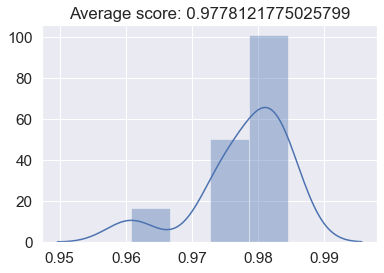

In [195]:
# use seaborn (sns) to plot a graph of the above scores
sns.distplot(cross_validation_scores_RF)
plt.title('Average score: {}'.format(np.mean(cross_validation_scores_RF)))

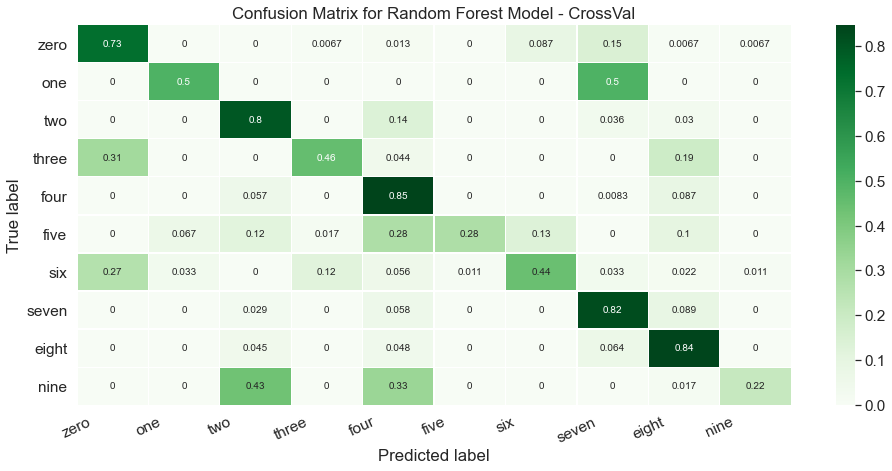

<Figure size 432x288 with 0 Axes>

In [196]:
#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_crossVal = cross_val_predict(RF_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_crossVal = confusion_matrix(y_train, y_pred_RF_crossVal)
conf_matrix_RF_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_crossVal = classification_report(y_train, y_pred_RF_crossVal)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - CrossVal')
plt.show()
plt.close()


#Find the accuracy of this model based on the test data
#accuracy_RF_crossVal = accuracy_score(y_train, y_pred_RF_crossVal)*100

#RF_crossVal_data = [n_nodes_RF_crossVal, depth_RF_crossVal, num_Leaves_RF_crossVal, accuracy_RF_crossVal]


In [197]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_crossVal)

print("\n")
print(classification_report_RF_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")


Confusion Matrix
[[ 529    0    0    1    4    0    3    2    1    0]
 [   2  202    0    2    0    0    0    0    4    0]
 [   0    0 1962    0   11    0    0    0    7    0]
 [   2    0    1  259    3    0    0    3    2    0]
 [   0    0   10    0 2182    0    0    6   22    0]
 [   1    0    1    0    1  236    1    0    0    0]
 [   4    0    3    0    8    0  342    2    1    0]
 [   0    1    3    0   13    0    0 1375   18    0]
 [   0    0   11    0   30    0    0   15 2194    0]
 [   0    0    2    0   22    0    0    1    1  184]]


              precision    recall  f1-score   support

       eight       0.98      0.98      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.96      0.97       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.98      0.99       240
         six       0.99      0.95      0.97       360
       three     

<hr>
<h4>Part 2 - Using test data<h4>

Goal : Run decision classifier on test data provided

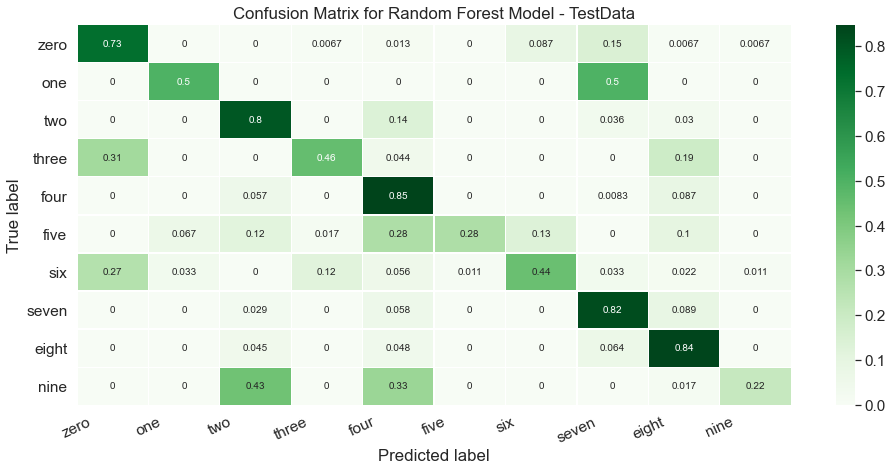

In [221]:
#define the model to be used 
RF_withTestData = RandomForestClassifier()

#fit this model using the test data
RF_withTestData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_withTestData = RF_withTestData.predict(X_test)


#confusion matrix generation
conf_matrix_RF_withTestData = confusion_matrix(y_test, y_pred_RF_withTestData)
conf_matrix_RF_withTestData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_withTestData = classification_report(y_test, y_pred_RF_withTestData)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_withTestData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - TestData')
plt.show()
plt.close()

#Find the accuracy of this model based on the test data

#no need for this yet, as cannot generate nodes, leaves or accuracy independantly. But here incase we find a way
#RF_withTestData_data = [n_nodes_RF_withTestData, depth_RF_withTestData, num_Leaves_RF_withTestData, accuracy_RF_withTestData]

In [222]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_withTestData)
print("\n")
print(classification_report_RF_withTestData)

Confusion Matrix
[[103   0   0   6   6   0  11  17   6   1]
 [  0  29   1   0   0   0   0  30   0   0]
 [  1   0 508   0  88   0   0  40  23   0]
 [ 43   0   0  40   3   0   0   0   4   0]
 [  0   0  37   0 614   0   0  10  59   0]
 [  0   2  17   0   9  18   9   0   5   0]
 [ 29   0   0  11   3   1  41   2   2   1]
 [  0   0  15   0  29   0   1 360  45   0]
 [  0   0  40   0  36   0   0  39 635   0]
 [  0   0  26   0  25   0   0   0   1   8]]


              precision    recall  f1-score   support

       eight       0.59      0.69      0.63       150
        five       0.94      0.48      0.64        60
        four       0.79      0.77      0.78       660
        nine       0.70      0.44      0.54        90
         one       0.76      0.85      0.80       720
       seven       0.95      0.30      0.46        60
         six       0.66      0.46      0.54        90
       three       0.72      0.80      0.76       450
         two       0.81      0.85      0.83       750
        z

<hr>
<h4>Part 3 - 4000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set.

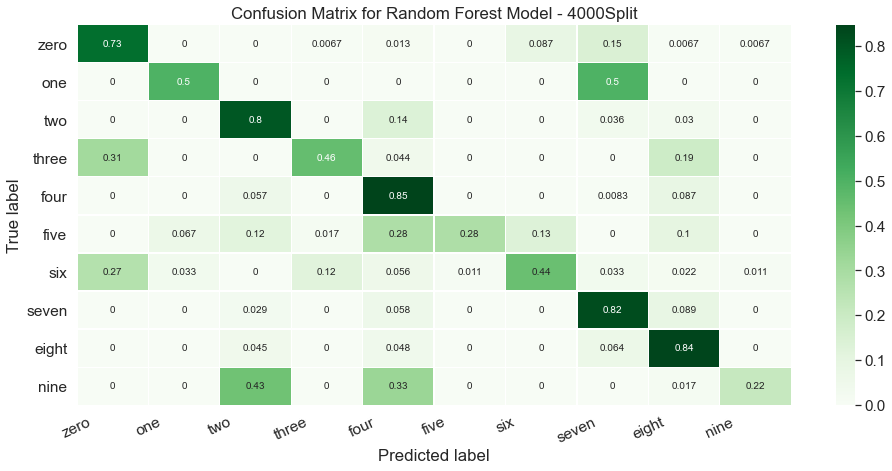

<Figure size 432x288 with 0 Axes>

In [200]:
#define the model to be used 
RF_4000Split = RandomForestClassifier()

#fit this model using the test data
RF_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_4000Split = RF_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_4000Split)
conf_matrix_RF_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_4000Split = classification_report(y_test_4000Split, y_pred_RF_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 4000Split')
plt.show()
plt.close()

#Tree topology metrics
#n_nodes_RF_4000Split = RF_4000Split.tree_.node_count
#depth_RF_4000Split = RF_4000Split.get_depth()
#num_Leaves_RF_4000Split = RF_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_4000Split)*100

#RF_4000Split_data = [n_nodes_RF_4000Split, depth_RF_4000Split, num_Leaves_RF_4000Split, accuracy_RF_4000Split]

In [201]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_4000Split)
print("\n")
print(classification_report_RF_4000Split)

Confusion Matrix
[[ 312    0    2    6    7    0   17   14    5    0]
 [   4   92    9    1    1    0    0   30    2    0]
 [   1    0 1293    0  100    0    0   26   26    0]
 [  42    0    0  152    6    0    3    2    7    0]
 [   0    0   49    0 1503    0    0   11   85    0]
 [   2    3    5    2   11  115   11    0   16    0]
 [  32    0    1    9   11    0  181    2    5    0]
 [   0    0   14    0   36    0    0  954   61    0]
 [   0    0   48    0   54    0    0   55 1506    0]
 [   0    0   18    0   51    0    0    0    4   75]]


              precision    recall  f1-score   support

       eight       0.79      0.86      0.83       363
        five       0.97      0.66      0.79       139
        four       0.90      0.89      0.90      1446
        nine       0.89      0.72      0.80       212
         one       0.84      0.91      0.88      1648
       seven       1.00      0.70      0.82       165
         six       0.85      0.75      0.80       241
       three     

<hr>
<h4>Part 4 - 9000 into the test cases <h4>

Goal : Run decision tree classifier on a reduced training set, but increased training set

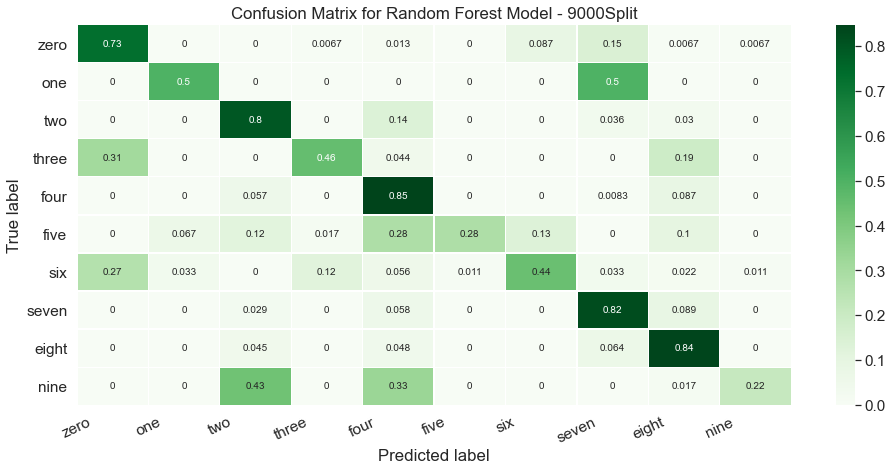

<Figure size 432x288 with 0 Axes>

In [202]:
#define the model to be used 
RF_9000Split = RandomForestClassifier()

#fit this model using the test data
RF_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_9000Split = RF_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_9000Split)
conf_matrix_RF_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_9000Split = classification_report(y_test_9000Split, y_pred_RF_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 9000Split')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_9000Split = RF_9000Split.tree_.node_count
#depth_RF_9000Split = RF_9000Split.get_depth()
#num_Leaves_RF_9000Split = RF_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_9000Split)*100

#RF_9000Split_data = [n_nodes_RF_9000Split, depth_RF_9000Split, num_Leaves_RF_9000Split, accuracy_RF_9000Split]

In [203]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_9000Split)
print("\n")
print(classification_report_RF_9000Split)


Confusion Matrix
[[ 447   15   42   27   26    0   20   43   26    0]
 [  47  100   61   20   14    0    0    0   10    0]
 [   3    0 1941    0  280    0    0   86  176    0]
 [  43    0    1  212   19    0   15   16   28    0]
 [   3    0  179    0 2063    0    0   77  465    0]
 [  51    9   37   19   25   77   19    9   41    0]
 [  51    5   40   20   26    0  236   37    9    0]
 [   7    0  177    0  139    0   10 1253  182    0]
 [   6    0  250    0  262    0    1  397 1936    0]
 [   0    0   24    0  172    0    0    0   13   45]]


              precision    recall  f1-score   support

       eight       0.68      0.69      0.69       646
        five       0.78      0.40      0.52       252
        four       0.71      0.78      0.74      2486
        nine       0.71      0.63      0.67       334
         one       0.68      0.74      0.71      2787
       seven       1.00      0.27      0.42       287
         six       0.78      0.56      0.65       424
       three     

<h4> Exploratory <h4>

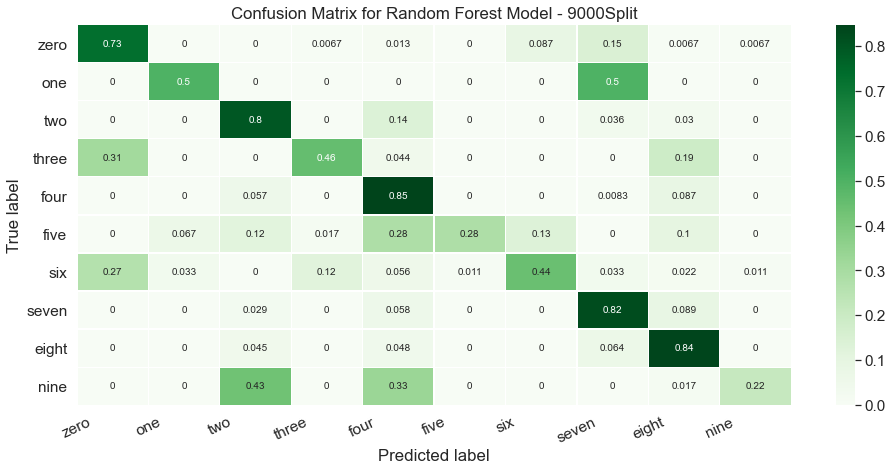

<Figure size 432x288 with 0 Axes>

In [204]:
#define the model to be used 
RF_9000Split = RandomForestClassifier()

#fit this model using the test data
RF_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_9000Split = RF_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_9000Split)
conf_matrix_RF_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_9000Split = classification_report(y_test_9000Split, y_pred_RF_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model - 9000Split')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_9000Split = RF_9000Split.tree_.node_count
#depth_RF_9000Split = RF_9000Split.get_depth()
#num_Leaves_RF_9000Split = RF_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_9000Split)*100

#RF_9000Split_data = [n_nodes_RF_9000Split, depth_RF_9000Split, num_Leaves_RF_9000Split, accuracy_RF_9000Split]

In [205]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_9000Split)
print("\n")
print(classification_report_RF_9000Split)

Confusion Matrix
[[ 455    7   45   47   17    1   10   40   24    0]
 [  40  105   57   18   19    0    0    2   11    0]
 [   3    2 1884    0  262    0    0   88  247    0]
 [  38    2    3  213   14    0    6   24   34    0]
 [  16    0  172    0 2098    0    0   59  442    0]
 [  56   10   37   32   20   63   23   18   28    0]
 [  60    9   46   26   21    0  212   36   14    0]
 [   2    0  217    0  169    0    8 1193  179    0]
 [   4    0  251    0  276    0    7  366 1948    0]
 [   0    0   27    0  175    0    0    3    7   42]]


              precision    recall  f1-score   support

       eight       0.68      0.70      0.69       646
        five       0.78      0.42      0.54       252
        four       0.69      0.76      0.72      2486
        nine       0.63      0.64      0.64       334
         one       0.68      0.75      0.72      2787
       seven       0.98      0.22      0.36       287
         six       0.80      0.50      0.61       424
       three     

<h4> Generate Table to Explore Results <h4>

In [206]:
#infoFrames = [RF_crossVal_data, RF_withTestData_data, RF_4000Split_data, RF_9000Split_data]

#RF_Table = pd.DataFrame(infoFrames, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table

<h3> RF Parameter Exploration <h3>

<hr>


    
Goal : To understand how binary splits or multiple branching, pruning,
confidence threshold for pruning, and the minimal number of instances permissible per leaf.

<h4> binary splits or multiple branching <h4> 

Editing this with the RandomForestClassifier is not possible, thus we must hypothesize on its effects.

<h4>Pruning<h4>

 Information on pruning a decision tree classifier, if it doesnt work open a tab in incognito mode and it will show you the full article. 
 https://medium.com/swlh/post-pruning-decision-trees-using-python-b5d4bcda8e23
 
 the below implementation is heavily influenced by the above link.

part 1 - Cross-Validation

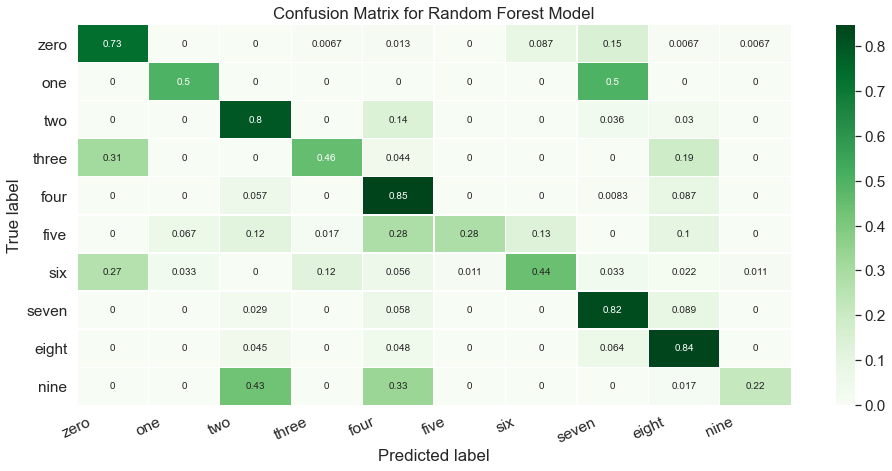



0.0005


Confusion Matrix
[[ 523    0    1    2    8    0    2    2    2    0]
 [   2  196    0    2    1    0    0    1    8    0]
 [   0    0 1940    0   21    0    0    3   16    0]
 [   5    0    0  242   10    1    1    8    3    0]
 [   0    0   19    0 2150    0    0    8   43    0]
 [   3    0    1    0    1  233    1    0    1    0]
 [   3    1    4    0    9    0  335    7    1    0]
 [   0    0    5    0   19    0    0 1355   31    0]
 [   0    0   21    0   38    0    0   15 2176    0]
 [   0    0    4    0   46    0    0    0    1  159]]


              precision    recall  f1-score   support

       eight       0.98      0.97      0.97       540
        five       0.99      0.93      0.96       210
        four       0.97      0.98      0.98      1980
        nine       0.98      0.90      0.94       270
         one       0.93      0.97      0.95      2220
       seven       1.00      0.97      0.98       240
         six       0.99      0.93      0.96       360
      

<Figure size 432x288 with 0 Axes>

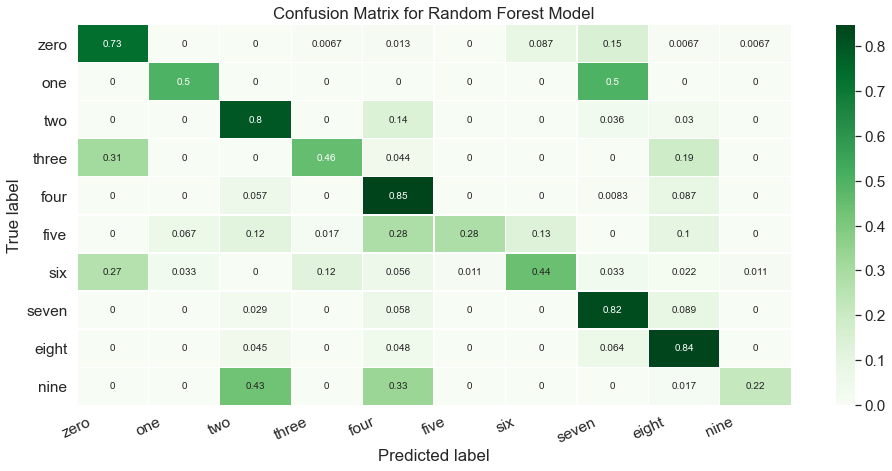



0.001


Confusion Matrix
[[ 510    0    1    1   12    0    3    7    6    0]
 [   4  184    1    3    1    2    2    2   11    0]
 [   0    0 1894    0   61    0    0    4   21    0]
 [   7    0    0  228   14    0    1   11    9    0]
 [   0    0   44    0 2110    0    0   15   51    0]
 [   3    0    1    0    2  230    3    0    1    0]
 [   8    0    7    0   14    0  322    4    5    0]
 [   0    0    6    0   33    0    0 1324   47    0]
 [   0    0   33    0   68    0    0   24 2125    0]
 [   0    0    3    0   79    0    0    0    2  126]]


              precision    recall  f1-score   support

       eight       0.96      0.94      0.95       540
        five       1.00      0.88      0.93       210
        four       0.95      0.96      0.95      1980
        nine       0.98      0.84      0.91       270
         one       0.88      0.95      0.91      2220
       seven       0.99      0.96      0.97       240
         six       0.97      0.89      0.93       360
       

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

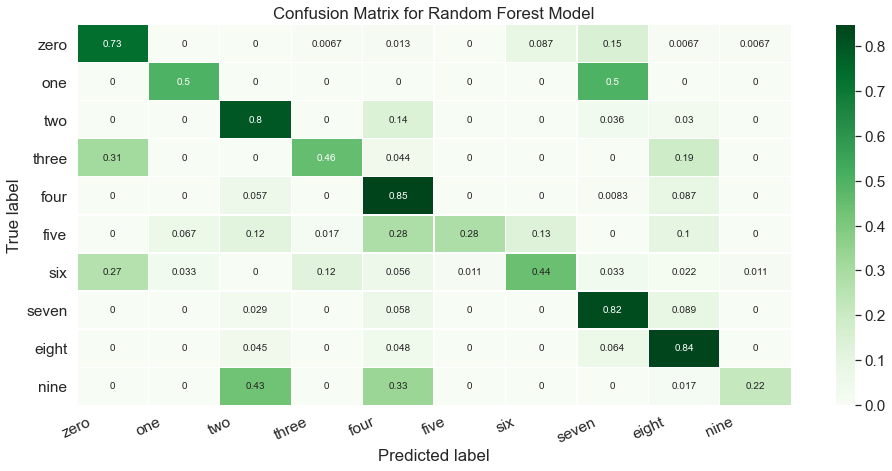



0.005


Confusion Matrix
[[ 318    0   18    2   49    0   21   82   50    0]
 [  68    1   30   10   17    0    0   17   67    0]
 [   0    0 1618    0  197    0    0   18  147    0]
 [  44    0    1   84   21    0    0   45   75    0]
 [   0    0  148    0 1804    0    0   82  186    0]
 [  46    0    6    1   21   59   24   32   51    0]
 [  24    0   12    2   15    0  123  161   23    0]
 [   0    0   39    0   83    0    0 1137  151    0]
 [   0    0  109    0  151    0    0  235 1755    0]
 [   0    0    2    0  202    0    0    4    2    0]]


              precision    recall  f1-score   support

       eight       0.64      0.59      0.61       540
        five       1.00      0.00      0.01       210
        four       0.82      0.82      0.82      1980
        nine       0.85      0.31      0.46       270
         one       0.70      0.81      0.75      2220
       seven       1.00      0.25      0.39       240
         six       0.73      0.34      0.47       360
       

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

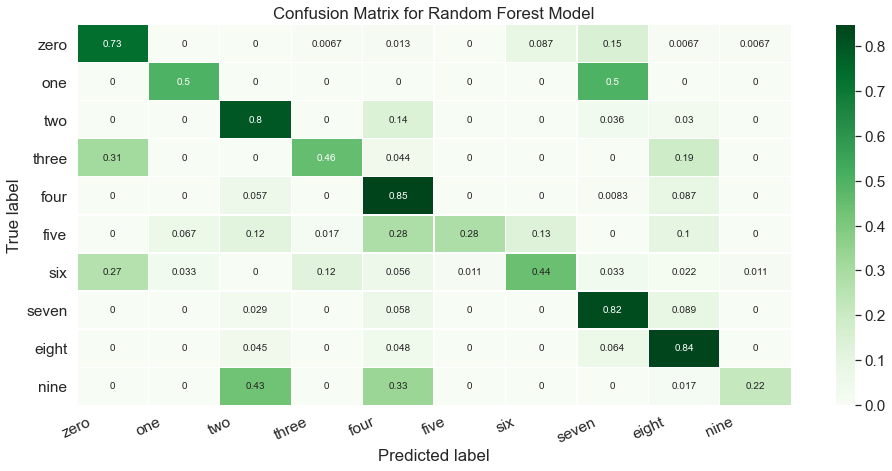



0.01


Confusion Matrix
[[ 113    0    2    0  116    0    0  126  183    0]
 [  16    0   30    0   26    0    0   15  123    0]
 [   0    0 1255    0  347    0    0   90  288    0]
 [  35    0    0    0   23    0    0   35  177    0]
 [   0    0   74    0 1623    0    0  235  288    0]
 [  10    0    2    0   11    0    0   67  150    0]
 [   2    0   20    0   16    0    0  267   55    0]
 [   0    0  108    0  101    0    0  959  242    0]
 [   0    0   75    0  254    0    0  269 1652    0]
 [   0    0    1    0  199    0    0    0   10    0]]


              precision    recall  f1-score   support

       eight       0.64      0.21      0.32       540
        five       0.00      0.00      0.00       210
        four       0.80      0.63      0.71      1980
        nine       0.00      0.00      0.00       270
         one       0.60      0.73      0.66      2220
       seven       0.00      0.00      0.00       240
         six       0.00      0.00      0.00       360
       t

<Figure size 432x288 with 0 Axes>

In [207]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:

    RF_pruned_crossVal = RandomForestClassifier(ccp_alpha = i)
    RF_pruned_crossVal.fit(X_train, y_train)

    #setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
    cross_validation_scores_RF_pruned = cross_val_score(RF_pruned_crossVal, X_train, y_train, cv=10)

    #train model with 10 fold validation, 
    #cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
    y_pred_RF_pruned_crossVal = cross_val_predict(RF_pruned_crossVal, X_train, y_train, cv=10)

    #confusion matrix generation
    conf_matrix_RF_pruned_crossVal = confusion_matrix(y_train, y_pred_RF_pruned_crossVal)
    conf_matrix_RF_pruned_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #accuracy report
    classification_report_RF_pruned_crossVal = classification_report(y_train, y_pred_RF_pruned_crossVal)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_crossVal2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_crossVal)
    print("\n")
    print(classification_report_RF_pruned_crossVal)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_crossVal = RF_pruned_crossVal.tree_.node_count
#depth_RF_pruned_crossVal = RF_pruned_crossVal.get_depth()
#num_Leaves_RF_pruned_crossVal = RF_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_crossVal = accuracy_score(y_train, y_pred_RF_pruned_crossVal)*100

#RF_pruned_crossVal_data = [n_nodes_RF_pruned_crossVal, depth_RF_pruned_crossVal, num_Leaves_RF_pruned_crossVal, accuracy_RF_pruned_crossVal]


Part 2 - With test Data



0.0005


Confusion Matrix
[[110   0   0   5   5   0  11  17   2   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  1   0 511   0  90   0   0  33  25   0]
 [ 36   0   0  41   3   0   0   0  10   0]
 [  0   0  37   0 618   0   0   7  58   0]
 [  0   3   9   0  10  13  12   0  13   0]
 [ 29   0   0  10  11   0  35   1   3   1]
 [  0   0  10   0  28   0   1 365  46   0]
 [  0   0  32   0  36   0   0  56 626   0]
 [  0   0  27   0  28   0   0   0   0   5]]


              precision    recall  f1-score   support

       eight       0.62      0.73      0.67       150
        five       0.91      0.50      0.65        60
        four       0.82      0.77      0.79       660
        nine       0.73      0.46      0.56        90
         one       0.75      0.86      0.80       720
       seven       1.00      0.22      0.36        60
         six       0.59      0.39      0.47        90
       three       0.72      0.81      0.76       450
         two       0.80      0.83      0.82       75

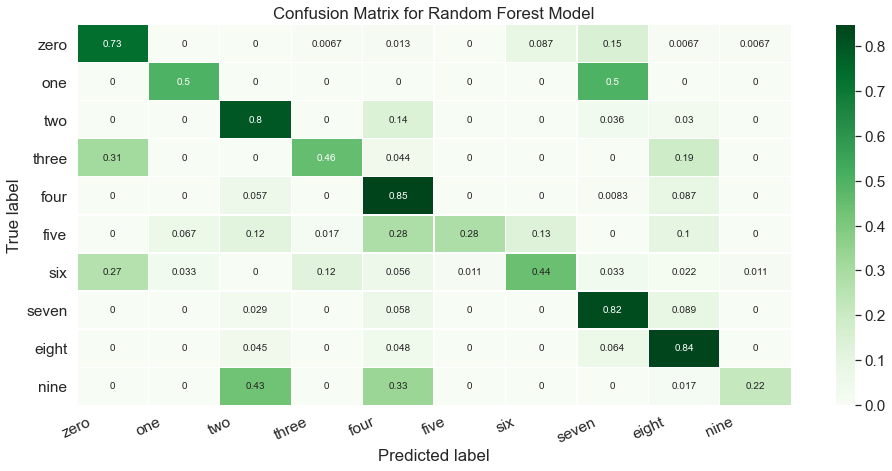



0.001


Confusion Matrix
[[102   0   0   2   8   0  14  20   4   0]
 [  0  29   0   0   0   0   0  30   1   0]
 [  0   0 525   0  89   0   0  18  28   0]
 [ 40   0   0  39   1   0   0   0  10   0]
 [  0   0  34   0 612   0   0  11  63   0]
 [  0   4   8   0  10  15   7   0  16   0]
 [ 30   0   0   9  15   0  34   1   1   0]
 [  0   0  12   0  31   0   0 355  52   0]
 [  0   0  29   0  48   0   0  54 619   0]
 [  0   0  23   0  31   0   0   0   2   4]]


              precision    recall  f1-score   support

       eight       0.59      0.68      0.63       150
        five       0.88      0.48      0.62        60
        four       0.83      0.80      0.81       660
        nine       0.78      0.43      0.56        90
         one       0.72      0.85      0.78       720
       seven       1.00      0.25      0.40        60
         six       0.62      0.38      0.47        90
       three       0.73      0.79      0.76       450
         two       0.78      0.83      0.80       750

<Figure size 432x288 with 0 Axes>

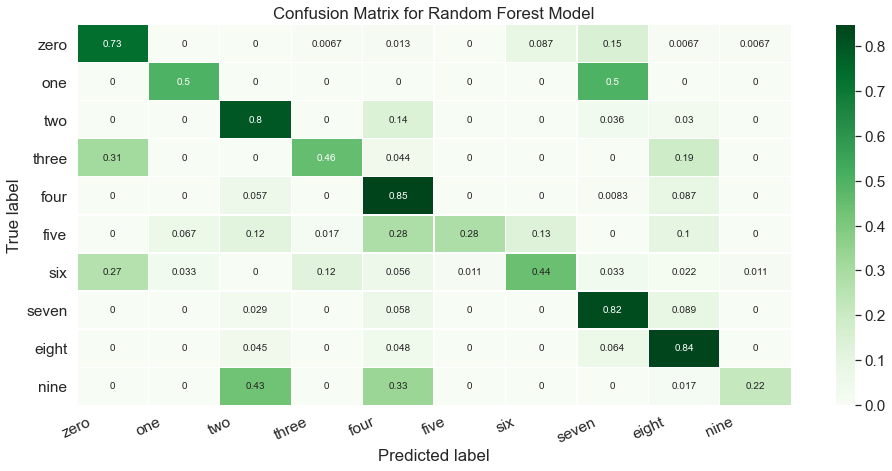



0.005


Confusion Matrix
[[ 72   0   0   1  14   0   4  37  22   0]
 [ 24   0   3   0   0   0   0  27   6   0]
 [  0   0 417   0 123   0   0  55  65   0]
 [ 38   0   0  26   1   0   0   1  24   0]
 [  0   0  51   0 563   0   0  32  74   0]
 [ 10   0   2   0  25   0   0   0  23   0]
 [ 38   0   0   0  17   0   0  20  15   0]
 [  0   0  12   0  47   0   0 304  87   0]
 [  0   0  20   0  52   0   0 144 534   0]
 [  0   0   7   0  51   0   0   0   2   0]]


              precision    recall  f1-score   support

       eight       0.40      0.48      0.43       150
        five       0.00      0.00      0.00        60
        four       0.81      0.63      0.71       660
        nine       0.96      0.29      0.44        90
         one       0.63      0.78      0.70       720
       seven       0.00      0.00      0.00        60
         six       0.00      0.00      0.00        90
       three       0.49      0.68      0.57       450
         two       0.63      0.71      0.67       750

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

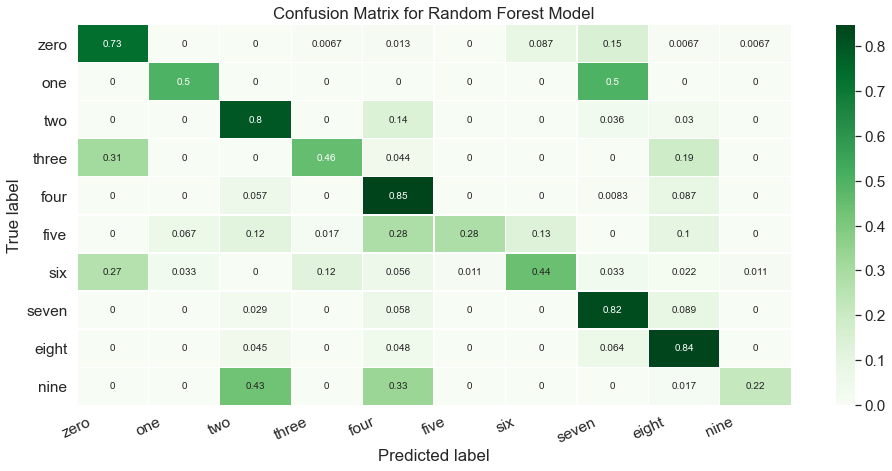



0.01


Confusion Matrix
[[ 21   0   0   0  14   0   0  40  75   0]
 [  9   0  30   0   0   0   0   0  21   0]
 [  0   0 326   0 168   0   0  88  78   0]
 [ 11   0   0   0   3   0   0   1  75   0]
 [  0   0  15   0 567   0   0  56  82   0]
 [  0   0   3   0  10   0   0   0  47   0]
 [  9   0   0   0  18   0   0  16  47   0]
 [  0   0   2   0  56   0   0 270 122   0]
 [  0   0   3   0  85   0   0 161 501   0]
 [  0   0   1   0  59   0   0   0   0   0]]


              precision    recall  f1-score   support

       eight       0.42      0.14      0.21       150
        five       0.00      0.00      0.00        60
        four       0.86      0.49      0.63       660
        nine       0.00      0.00      0.00        90
         one       0.58      0.79      0.67       720
       seven       0.00      0.00      0.00        60
         six       0.00      0.00      0.00        90
       three       0.43      0.60      0.50       450
         two       0.48      0.67      0.56       750


/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

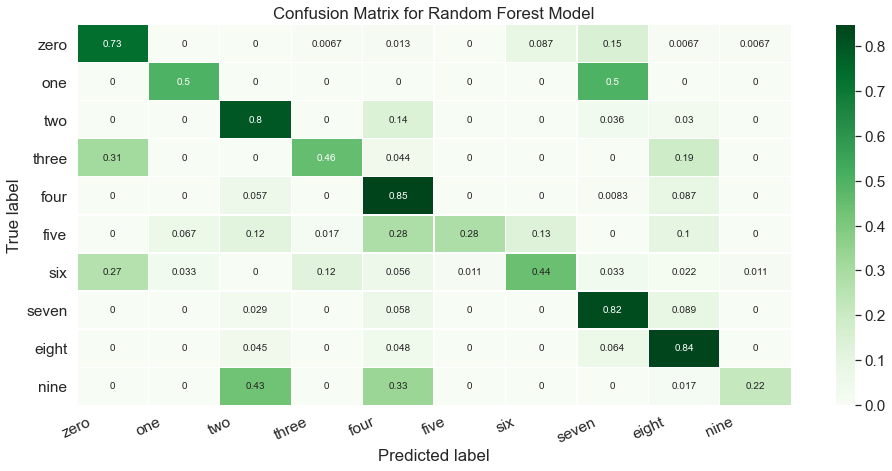

<Figure size 432x288 with 0 Axes>

In [208]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_testData = RandomForestClassifier(ccp_alpha=i)

    #fit this model using the test data
    RF_pruned_testData.fit(X_train, y_train)

    #test this model on the seperated data
    y_pred_RF_pruned_testData = RF_pruned_testData.predict(X_test)

    #generate confusion matrix
    conf_matrix_RF_pruned_testData = confusion_matrix(y_test, y_pred_RF_pruned_testData)
    conf_matrix_RF_pruned_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_testData = classification_report(y_test, y_pred_RF_pruned_testData)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    
    #Print Confusion matrix and other important results
    
    print('\n')
    print(i)
    print('\n')
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_testData)
    print("\n")
    print(classification_report_RF_pruned_testData)
    print('\n')
    plt.show()
    plt.clf()
#Tree topology metrics
#n_nodes_RF_pruned_testData = RF_pruned_testData.tree_.node_count
#depth_RF_pruned_testData = RF_pruned_testData.get_depth()
#num_Leaves_RF_pruned_testData = RF_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_testData = accuracy_score(y_test, y_pred_RF_pruned_testData)*100

#RF_pruned_testData_data = [n_nodes_RF_pruned_testData, depth_RF_pruned_testData, num_Leaves_RF_pruned_testData, accuracy_RF_pruned_testData]


part 3 - 4000 Split 



0.0005


Confusion Matrix
[[ 311    0    0    3    5    0   13   26    4    1]
 [   0   96    6    1    0    1    0   30    5    0]
 [   1    0 1286    0  113    0    0   12   34    0]
 [  39    0    0  149    5    0    2    4   13    0]
 [   0    0   58    0 1492    0    0    8   90    0]
 [   3    8   26    1    2  116    4    0    5    0]
 [  35    1    0   10   15    0  169    5    6    0]
 [   0    0   15    0   46    0    0  931   73    0]
 [   0    0   44    0   74    0    0   71 1474    0]
 [   0    0   22    0   62    0    0    0    0   64]]


              precision    recall  f1-score   support

       eight       0.80      0.86      0.83       363
        five       0.91      0.69      0.79       139
        four       0.88      0.89      0.89      1446
        nine       0.91      0.70      0.79       212
         one       0.82      0.91      0.86      1648
       seven       0.99      0.70      0.82       165
         six       0.90      0.70      0.79       241
      

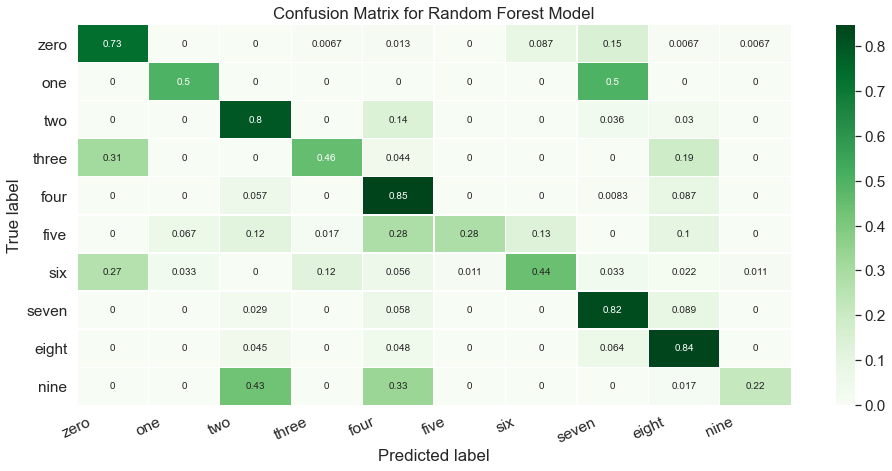



0.001


Confusion Matrix
[[ 305    0    1    4    8    0   14   25    6    0]
 [   3   89   13    4    1    0    1   26    2    0]
 [   0    0 1279    0  121    0    0   21   25    0]
 [  39    0    0  144   10    0    2    4   13    0]
 [   0    0   60    0 1489    0    0   15   84    0]
 [   3    0   17    4   14  115    4    0    8    0]
 [  41    0    2    6   16    0  166    3    6    1]
 [   0    0   11    0   52    0    0  921   81    0]
 [   0    0   50    0   77    0    0   68 1468    0]
 [   0    0   31    0   59    0    0    0    1   57]]


              precision    recall  f1-score   support

       eight       0.78      0.84      0.81       363
        five       1.00      0.64      0.78       139
        four       0.87      0.88      0.88      1446
        nine       0.89      0.68      0.77       212
         one       0.81      0.90      0.85      1648
       seven       1.00      0.70      0.82       165
         six       0.89      0.69      0.78       241
       

<Figure size 432x288 with 0 Axes>

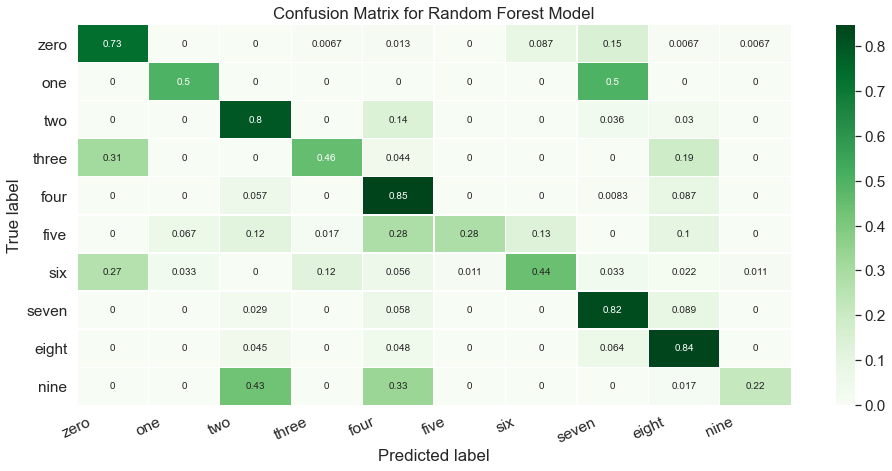

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




0.005


Confusion Matrix
[[ 204    0    7    0   21    0   26   65   40    0]
 [  52    5   42    1    5    0    1    9   24    0]
 [   0    0 1121    0  176    0    0   35  114    0]
 [  47    0    0   61   10    0    1   16   77    0]
 [   0    0   98    0 1321    0    0   59  170    0]
 [  32    0    3    0   16   27   15   10   62    0]
 [  50    0    4    1   22    0   58   83   23    0]
 [   0    0   17    0   75    0    0  782  191    0]
 [   0    0   76    0  121    0    0  201 1265    0]
 [   0    0    4    0  143    0    0    0    1    0]]


              precision    recall  f1-score   support

       eight       0.53      0.56      0.55       363
        five       1.00      0.04      0.07       139
        four       0.82      0.78      0.80      1446
        nine       0.97      0.29      0.44       212
         one       0.69      0.80      0.74      1648
       seven       1.00      0.16      0.28       165
         six       0.57      0.24      0.34       241
       

<Figure size 432x288 with 0 Axes>

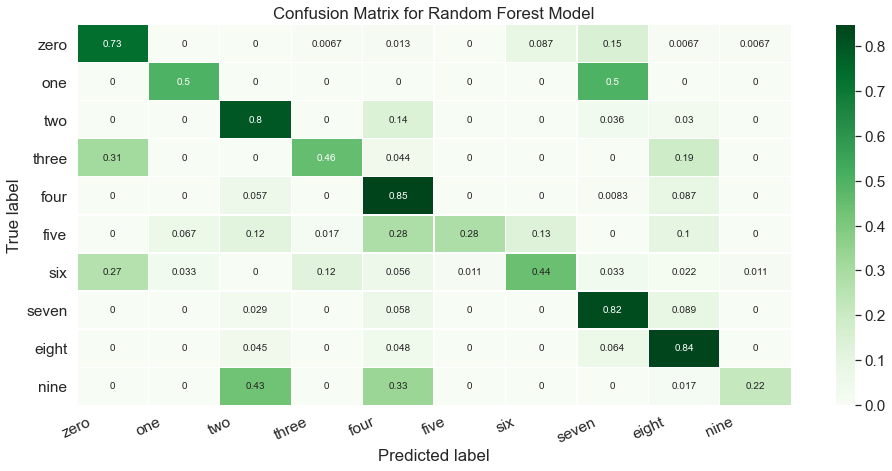



0.01


Confusion Matrix
[[ 115    0    9    0   63    0    0   86   90    0]
 [  28    0   44    0    8    0    0    4   55    0]
 [   0    0  888    0  301    0    0   73  184    0]
 [  48    0    1    0   16    0    0   11  136    0]
 [   0    0   54    0 1239    0    0  108  247    0]
 [  28    0    4    0   19    0    0   21   93    0]
 [  29    0   13    0   23    0    0  112   64    0]
 [   0    0   64    0   96    0    0  622  283    0]
 [   0    0   49    0  175    0    0  240 1199    0]
 [   0    0    0    0  145    0    0    0    3    0]]


              precision    recall  f1-score   support

       eight       0.46      0.32      0.38       363
        five       0.00      0.00      0.00       139
        four       0.79      0.61      0.69      1446
        nine       0.00      0.00      0.00       212
         one       0.59      0.75      0.66      1648
       seven       0.00      0.00      0.00       165
         six       0.00      0.00      0.00       241
       t

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

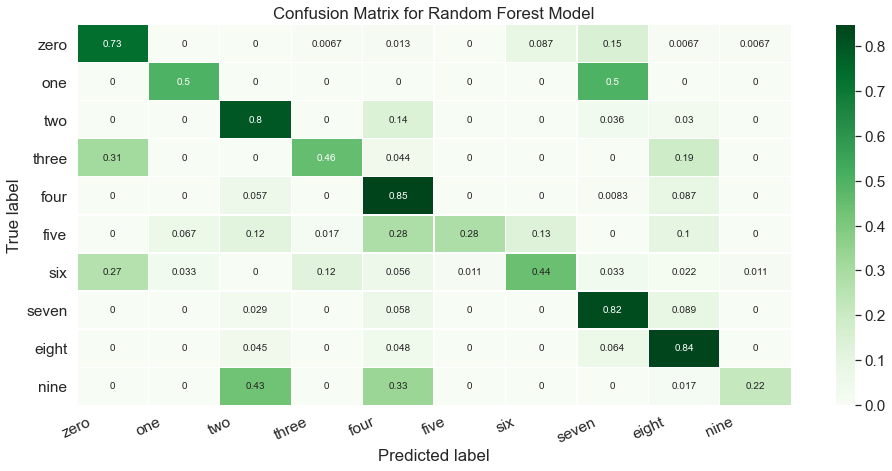

<Figure size 432x288 with 0 Axes>

In [209]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:

    #define the model to be used 
    RF_pruned_4000Split = RandomForestClassifier(ccp_alpha = i)

    #fit this model using the test data
    RF_pruned_4000Split.fit(X_train_4000Split, y_train_4000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_4000Split = RF_pruned_4000Split.predict(X_test_4000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_pruned_4000Split)
    conf_matrix_RF_pruned_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_4000Split = classification_report(y_test_4000Split, y_pred_RF_pruned_4000Split)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_4000Split2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_4000Split)
    print("\n")
    print(classification_report_RF_pruned_4000Split)
    print('\n')
    plt.show()
    plt.clf()
#Tree topology metrics
#n_nodes_RF_pruned_4000Split = RF_pruned_4000Split.tree_.node_count
#depth_RF_pruned_4000Split = RF_pruned_4000Split.get_depth()
#num_Leaves_RF_pruned_4000Split = RF_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_pruned_4000Split)*100

#RF_pruned_4000Split_data = [n_nodes_RF_pruned_4000Split, depth_RF_pruned_4000Split, num_Leaves_RF_pruned_4000Split, accuracy_RF_pruned_4000Split]


part 4 - 9000 Split

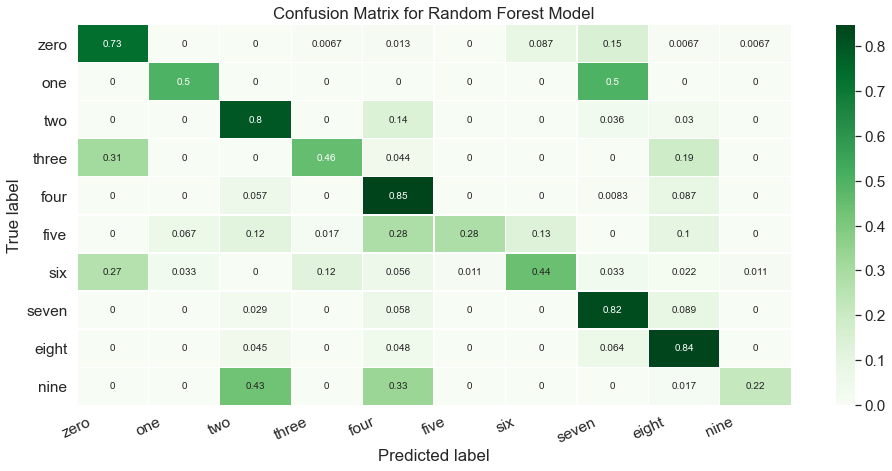



0.0005


Confusion Matrix
[[ 450   17   46   19   19    0   28   40   27    0]
 [  42  102   59   15   18    0    1    0   15    0]
 [   2    1 1930    0  292    0    1   77  183    0]
 [  40    1    3  209   13    0   11   19   38    0]
 [   1    0  194    0 2140    0    0   56  396    0]
 [  30    5   40   34   18   82   29   12   37    0]
 [  47   12   40   13   25    0  228   49   10    0]
 [   2    0  197    0  123    0    8 1236  202    0]
 [   2    0  228    0  260    0    0  407 1955    0]
 [   0    0   29    0  171    0    0    0   13   41]]


              precision    recall  f1-score   support

       eight       0.73      0.70      0.71       646
        five       0.74      0.40      0.52       252
        four       0.70      0.78      0.73      2486
        nine       0.72      0.63      0.67       334
         one       0.70      0.77      0.73      2787
       seven       1.00      0.29      0.44       287
         six       0.75      0.54      0.62       424
      

<Figure size 432x288 with 0 Axes>

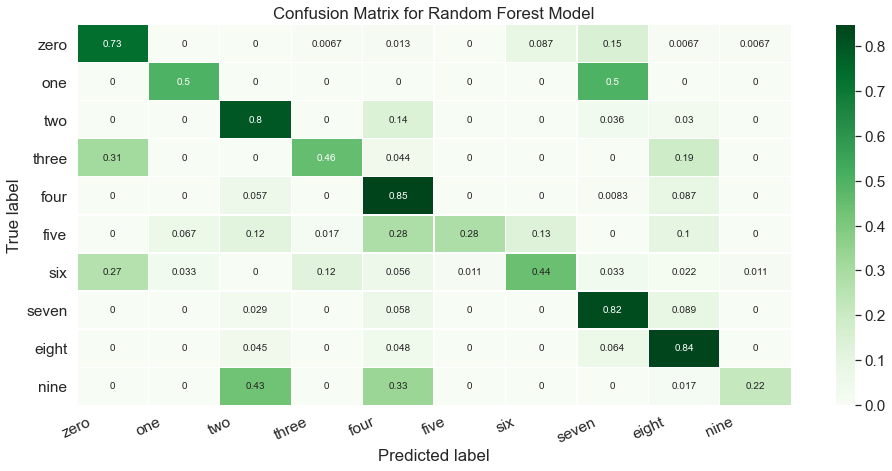



0.001


Confusion Matrix
[[ 452    5   34   32   22    0   17   56   28    0]
 [  38  112   58   17   12    0    0    0   15    0]
 [   3    0 1970    0  248    0    0   90  175    0]
 [  43    0    3  221   13    0    9   23   22    0]
 [   5    0  184    0 2081    0    1   67  449    0]
 [  41   10   37   27   20   79   25   13   35    0]
 [  52    8   42   24   29    0  226   33   10    0]
 [   6    0  192    0  133    0    9 1264  164    0]
 [   8    0  237    0  267    0    2  424 1914    0]
 [   0    0   21    0  179    0    0    1   19   34]]


              precision    recall  f1-score   support

       eight       0.70      0.70      0.70       646
        five       0.83      0.44      0.58       252
        four       0.71      0.79      0.75      2486
        nine       0.69      0.66      0.67       334
         one       0.69      0.75      0.72      2787
       seven       1.00      0.28      0.43       287
         six       0.78      0.53      0.63       424
       

<Figure size 432x288 with 0 Axes>

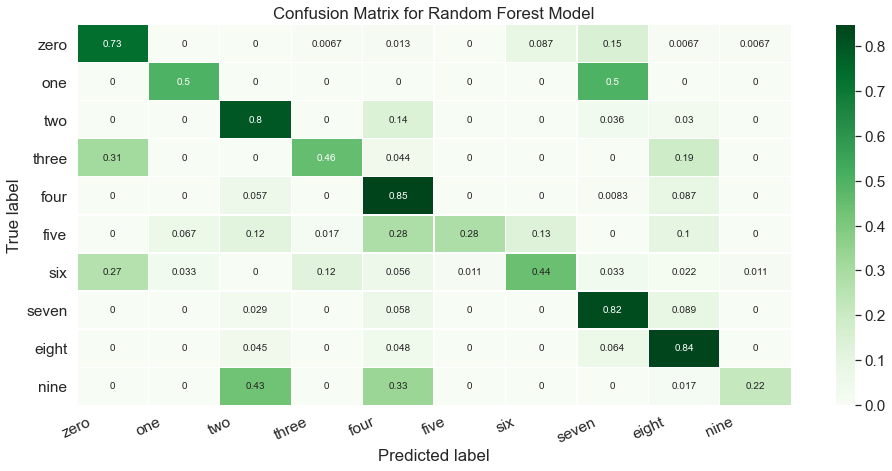



0.005


Confusion Matrix
[[ 437   14   23   27   22    0   23   58   42    0]
 [  39  101   60   19   10    0    0    0   23    0]
 [   3    0 1907    1  263    0    1   80  231    0]
 [  39    0    5  206   17    0   12   14   41    0]
 [   4    0  162    0 2086    0    1   76  458    0]
 [  36   14   35   15   20   92   20   17   38    0]
 [  54   10   37   14   24    0  233   43    9    0]
 [   4    0  180    0  121    0    8 1287  168    0]
 [   1    0  216    0  233    0    6  426 1970    0]
 [   0    0   28    0  171    0    0    0    9   46]]


              precision    recall  f1-score   support

       eight       0.71      0.68      0.69       646
        five       0.73      0.40      0.52       252
        four       0.72      0.77      0.74      2486
        nine       0.73      0.62      0.67       334
         one       0.70      0.75      0.73      2787
       seven       1.00      0.32      0.49       287
         six       0.77      0.55      0.64       424
       

<Figure size 432x288 with 0 Axes>

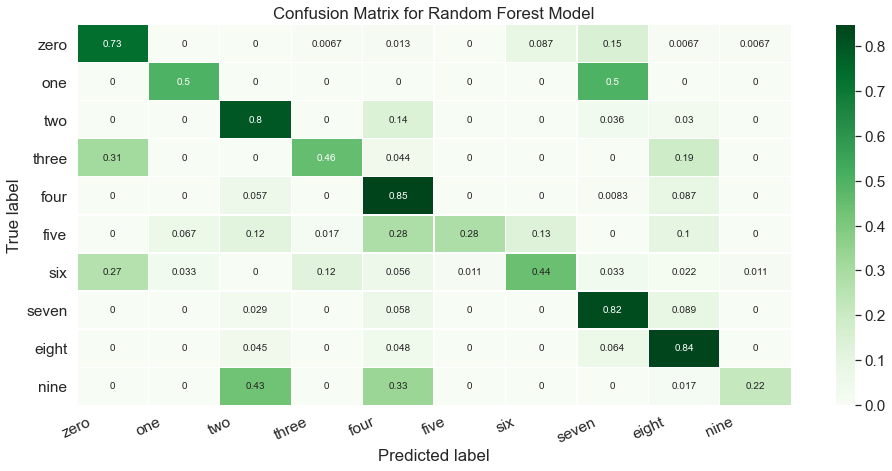



0.01


Confusion Matrix
[[ 443   16   33   25   27    0   15   50   37    0]
 [  43   99   59   14   14    0    0    0   23    0]
 [   3    0 1966    1  244    0    2   86  184    0]
 [  26    2    2  214   19    0   13    7   51    0]
 [   4    0  172    0 2118    0    1   88  404    0]
 [  40    6   28   16   28   72   33   22   42    0]
 [  43    7   32   11   27    1  240   46   17    0]
 [   5    0  160    0  147    0    9 1257  190    0]
 [   9    0  214    0  270    0    5  416 1938    0]
 [   0    0   29    0  183    0    0    1   11   30]]


              precision    recall  f1-score   support

       eight       0.72      0.69      0.70       646
        five       0.76      0.39      0.52       252
        four       0.73      0.79      0.76      2486
        nine       0.76      0.64      0.70       334
         one       0.69      0.76      0.72      2787
       seven       0.99      0.25      0.40       287
         six       0.75      0.57      0.65       424
       t

<Figure size 432x288 with 0 Axes>

In [210]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_9000Split = RandomForestClassifier(n_estimators = 150)

    #fit this model using the test data
    RF_pruned_9000Split.fit(X_train_9000Split, y_train_9000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_9000Split = RF_pruned_9000Split.predict(X_test_9000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_pruned_9000Split)
    conf_matrix_RF_pruned_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_9000Split = classification_report(y_test_9000Split, y_pred_RF_pruned_9000Split)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_9000Split)
    print("\n")
    print(classification_report_RF_pruned_9000Split)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]


In [211]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_pruned_9000Split)
print("\n")
print(classification_report_RF_pruned_9000Split)

Confusion Matrix
[[ 443   16   33   25   27    0   15   50   37    0]
 [  43   99   59   14   14    0    0    0   23    0]
 [   3    0 1966    1  244    0    2   86  184    0]
 [  26    2    2  214   19    0   13    7   51    0]
 [   4    0  172    0 2118    0    1   88  404    0]
 [  40    6   28   16   28   72   33   22   42    0]
 [  43    7   32   11   27    1  240   46   17    0]
 [   5    0  160    0  147    0    9 1257  190    0]
 [   9    0  214    0  270    0    5  416 1938    0]
 [   0    0   29    0  183    0    0    1   11   30]]


              precision    recall  f1-score   support

       eight       0.72      0.69      0.70       646
        five       0.76      0.39      0.52       252
        four       0.73      0.79      0.76      2486
        nine       0.76      0.64      0.70       334
         one       0.69      0.76      0.72      2787
       seven       0.99      0.25      0.40       287
         six       0.75      0.57      0.65       424
       three     

Exploratory 

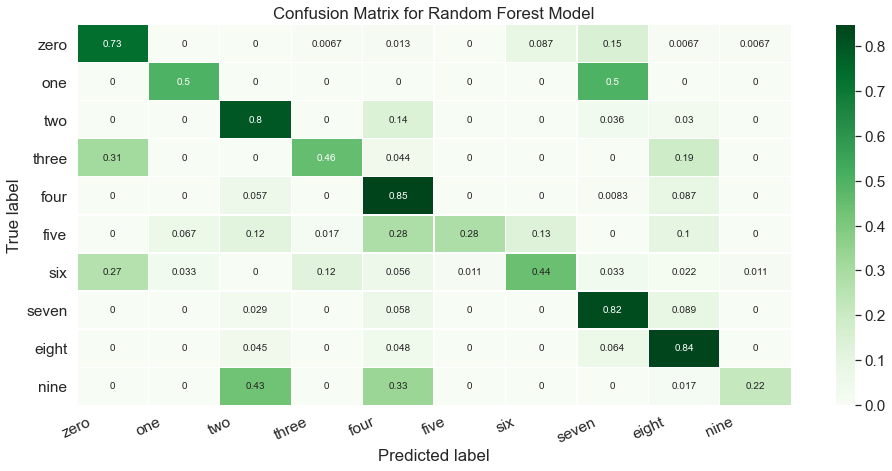



0.0005


Confusion Matrix
[[109   1   0   5   1   1  17  14   0   2]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 536   1  70   0   1  22  30   0]
 [ 31  10   0  38   3   2   0   0   6   0]
 [  0   0  42   0 651   0   0   7  20   0]
 [  0  22   0   2  18   6   0   0  12   0]
 [ 24   1   0  10   1   0  46   0   1   7]
 [  0   0   1   0  19   0   1 383  46   0]
 [  0   0  19   0  14   0   0  13 704   0]
 [  0   0   8   0  20   0   0   1   1  30]]


              precision    recall  f1-score   support

       eight       0.66      0.73      0.69       150
        five       0.47      0.50      0.48        60
        four       0.88      0.81      0.85       660
        nine       0.68      0.42      0.52        90
         one       0.82      0.90      0.86       720
       seven       0.67      0.10      0.17        60
         six       0.71      0.51      0.59        90
       three       0.81      0.85      0.83       450
         two       0.86      0.94      0.90       75

<Figure size 432x288 with 0 Axes>

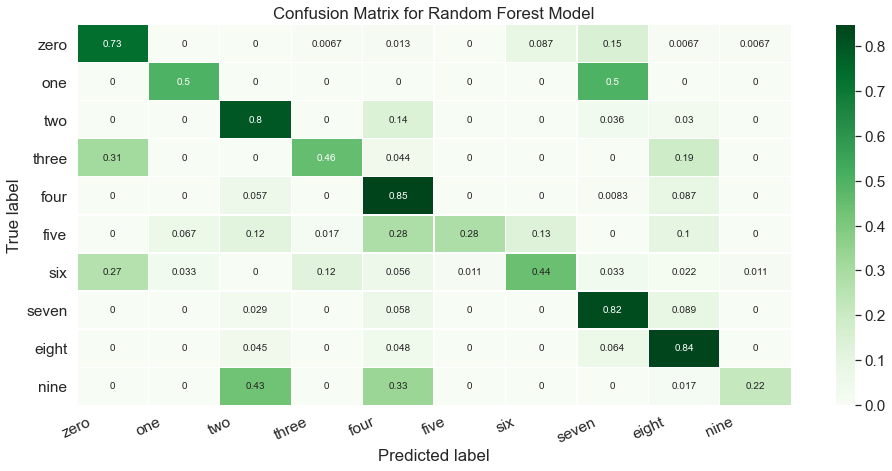



0.001


Confusion Matrix
[[105   2   0   5   4   0  21  12   0   1]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 541   1  66   0   1  24  27   0]
 [ 26  14   0  39   1   0   0   0  10   0]
 [  0   0  44   0 649   0   0   6  21   0]
 [  0  14   0   1  27  14   0   0   4   0]
 [ 25   1   0  11   3   0  42   1   1   6]
 [  0   0   2   0  25   0   1 382  40   0]
 [  0   0  23   0  11   0   0  11 705   0]
 [  0   0   9   0  22   0   0   1   0  28]]


              precision    recall  f1-score   support

       eight       0.67      0.70      0.69       150
        five       0.49      0.50      0.50        60
        four       0.87      0.82      0.85       660
        nine       0.68      0.43      0.53        90
         one       0.80      0.90      0.85       720
       seven       1.00      0.23      0.38        60
         six       0.65      0.47      0.54        90
       three       0.82      0.85      0.83       450
         two       0.87      0.94      0.91       750

<Figure size 432x288 with 0 Axes>

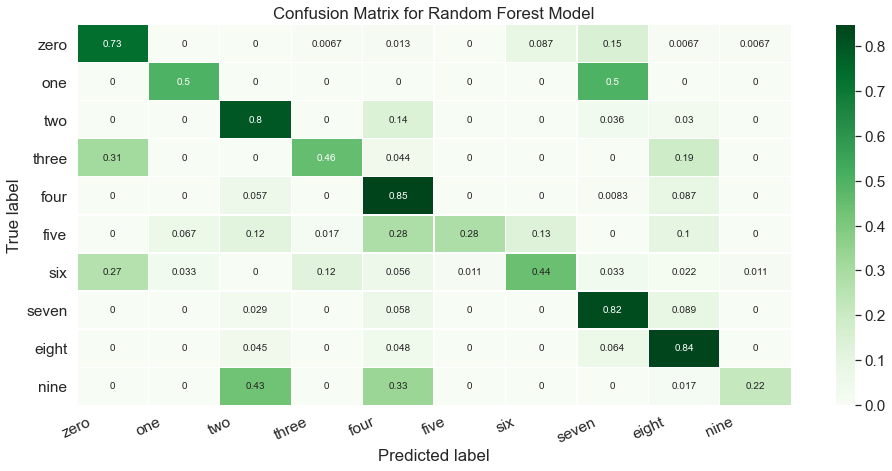



0.005


Confusion Matrix
[[106   2   0   2   1   0  20  16   1   2]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 534   1  71   0   1  24  28   1]
 [ 23  17   0  39   1   2   0   0   8   0]
 [  0   0  45   0 647   0   0   7  21   0]
 [  0  13   0   3  29  14   0   0   1   0]
 [ 27   1   1   8   1   0  43   1   1   7]
 [  0   0   1   0  22   0   1 379  47   0]
 [  0   0  17   0  15   0   0  13 705   0]
 [  0   0   7   0  25   0   0   0   0  28]]


              precision    recall  f1-score   support

       eight       0.68      0.71      0.69       150
        five       0.48      0.50      0.49        60
        four       0.88      0.81      0.84       660
        nine       0.74      0.43      0.55        90
         one       0.80      0.90      0.84       720
       seven       0.88      0.23      0.37        60
         six       0.66      0.48      0.55        90
       three       0.81      0.84      0.82       450
         two       0.87      0.94      0.90       750

<Figure size 432x288 with 0 Axes>

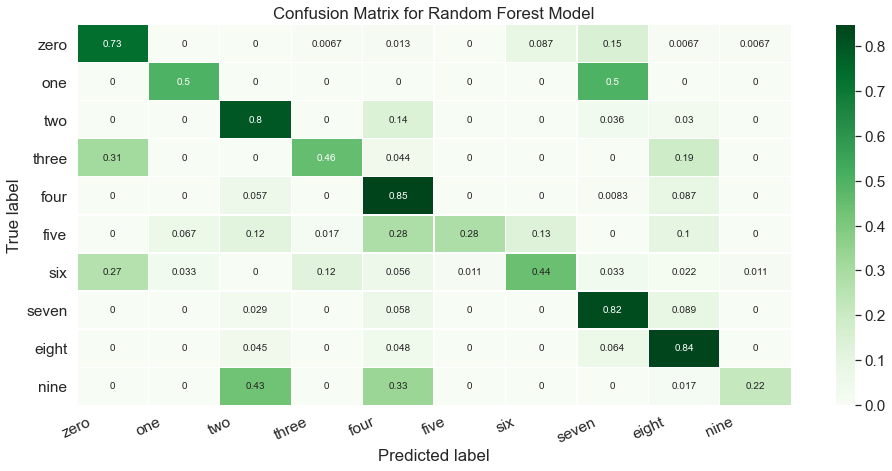



0.01


Confusion Matrix
[[104   2   0   3   4   2  21  12   0   2]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 532   1  70   0   0  28  29   0]
 [ 27   9   0  39   0   5   0   0  10   0]
 [  0   0  51   0 642   0   0   5  22   0]
 [  0  14   0   2  19  14   0   0  11   0]
 [ 19   0   0  10   3   0  51   0   1   6]
 [  0   0   1   0  18   0   1 382  48   0]
 [  0   0  19   0  12   0   0  13 706   0]
 [  0   0   7   0  28   0   0   0   0  25]]


              precision    recall  f1-score   support

       eight       0.69      0.69      0.69       150
        five       0.55      0.50      0.52        60
        four       0.87      0.81      0.84       660
        nine       0.71      0.43      0.54        90
         one       0.81      0.89      0.85       720
       seven       0.67      0.23      0.35        60
         six       0.70      0.57      0.63        90
       three       0.81      0.85      0.83       450
         two       0.85      0.94      0.90       750


<Figure size 432x288 with 0 Axes>

In [212]:
ccp_values = [0.0005,0.001, 0.005, 0.01]

for i in ccp_values:
    #define the model to be used 
    RF_pruned_Explore = RandomForestClassifier(n_estimators = 150)

    #fit this model using the test data
    RF_pruned_Explore.fit(X_train_Explore, y_train_Explore)

    #test this model on the seperated data
    y_pred_RF_pruned_Explore = RF_pruned_Explore.predict(X_test_Explore)

    #generate confusion matrix
    conf_matrix_RF_pruned_Explore = confusion_matrix(y_test_Explore, y_pred_RF_pruned_Explore)
    conf_matrix_RF_pruned_Explore2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_Explore = classification_report(y_test_Explore, y_pred_RF_pruned_Explore)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_Explore)
    print("\n")
    print(classification_report_RF_pruned_Explore)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]


summary table creation

In [213]:
#infoFrames2 = [RF_pruned_crossVal_data, RF_pruned_testData_data, RF_pruned_4000Split_data, RF_pruned_9000Split_data]

#RF_Table_pruned = pd.DataFrame(infoFrames2, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_pruned

<h3> nEstimators<h3>

<h4>Cross Val<h4>

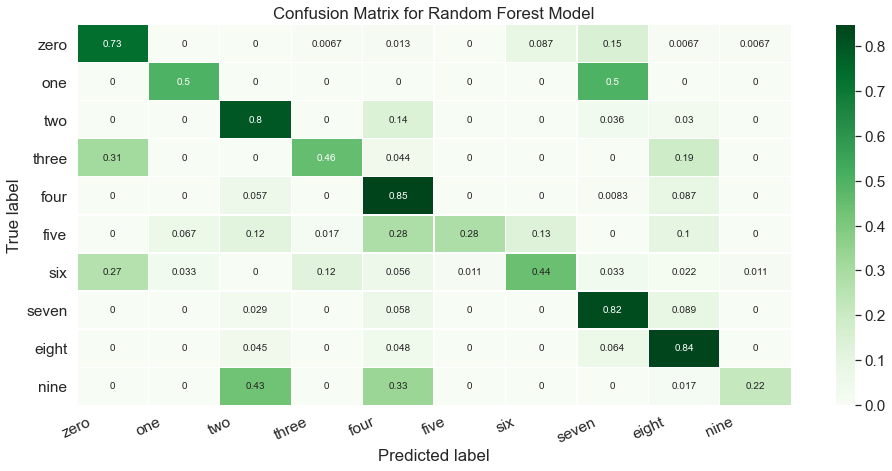



50


Confusion Matrix
[[ 526    0    1    1    6    0    4    2    0    0]
 [   1  202    0    2    2    1    0    0    2    0]
 [   0    0 1957    0   12    0    0    1   10    0]
 [   3    0    1  249    4    0    0    5    8    0]
 [   0    0   11    0 2167    0    0    4   38    0]
 [   0    0    1    0    0  239    0    0    0    0]
 [   5    0    4    1    7    0  336    6    1    0]
 [   0    0    3    0   16    0    0 1365   26    0]
 [   0    0   15    0   32    0    0    7 2196    0]
 [   0    0    3    0   24    0    0    0    3  180]]


              precision    recall  f1-score   support

       eight       0.98      0.97      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.98      1980
        nine       0.98      0.92      0.95       270
         one       0.95      0.98      0.97      2220
       seven       1.00      1.00      1.00       240
         six       0.99      0.93      0.96       360
       thr

<Figure size 432x288 with 0 Axes>

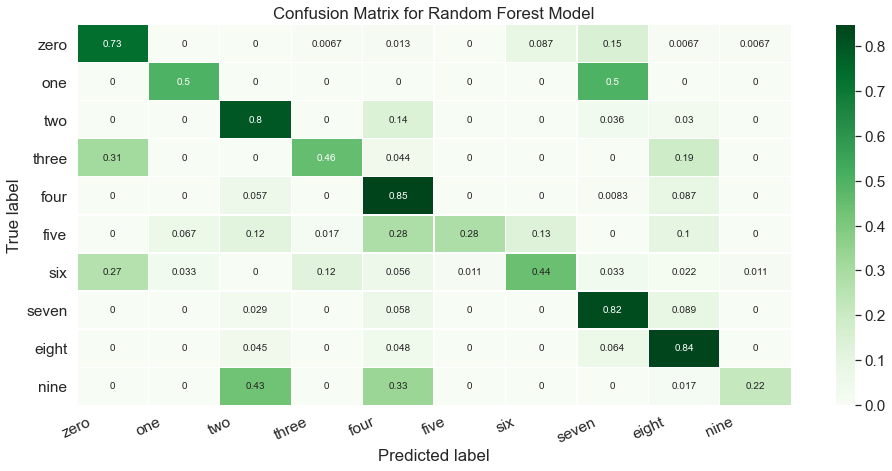



100


Confusion Matrix
[[ 527    0    0    1    5    0    2    3    2    0]
 [   1  203    1    1    0    0    0    0    4    0]
 [   0    0 1953    0   13    0    0    2   12    0]
 [   4    0    0  253    5    0    2    3    3    0]
 [   0    0   11    0 2178    0    0    4   27    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   2    0    3    0    9    0  343    2    1    0]
 [   0    0    2    0   13    0    1 1375   19    0]
 [   0    0   17    0   22    0    0    8 2203    0]
 [   0    0    1    0   23    0    0    0    3  183]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.98       540
        five       1.00      0.97      0.98       210
        four       0.98      0.99      0.98      1980
        nine       0.99      0.94      0.96       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.99      1.00       240
         six       0.99      0.95      0.97       360
       th

<Figure size 432x288 with 0 Axes>

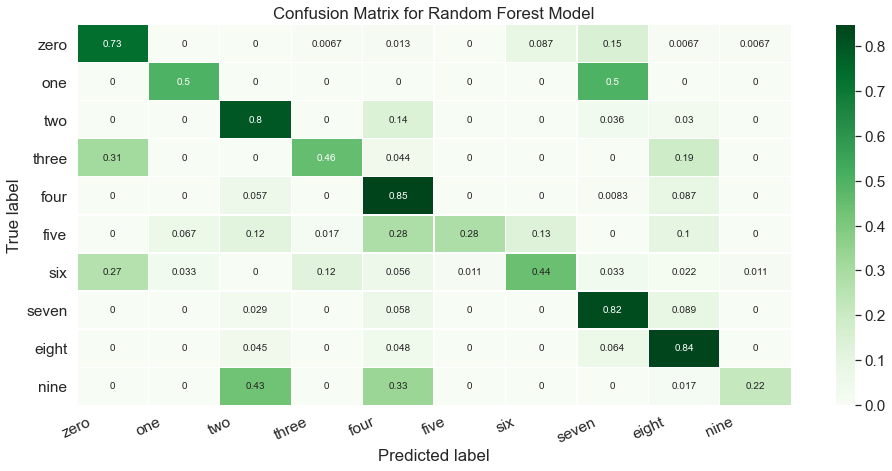



150


Confusion Matrix
[[ 526    0    0    1    8    0    1    3    1    0]
 [   1  202    0    1    0    1    0    0    5    0]
 [   0    0 1961    0    9    0    0    2    8    0]
 [   1    0    0  254    6    0    2    5    2    0]
 [   0    0   14    0 2179    0    0    4   23    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   2    0    3    0    7    0  343    3    2    0]
 [   0    0    2    0   14    0    0 1379   15    0]
 [   0    0   11    0   21    0    0    7 2211    0]
 [   0    0    4    0   21    0    0    0    2  183]]


              precision    recall  f1-score   support

       eight       0.99      0.97      0.98       540
        five       1.00      0.96      0.98       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.94      0.97       270
         one       0.96      0.98      0.97      2220
       seven       1.00      0.99      0.99       240
         six       0.99      0.95      0.97       360
       th

<Figure size 432x288 with 0 Axes>

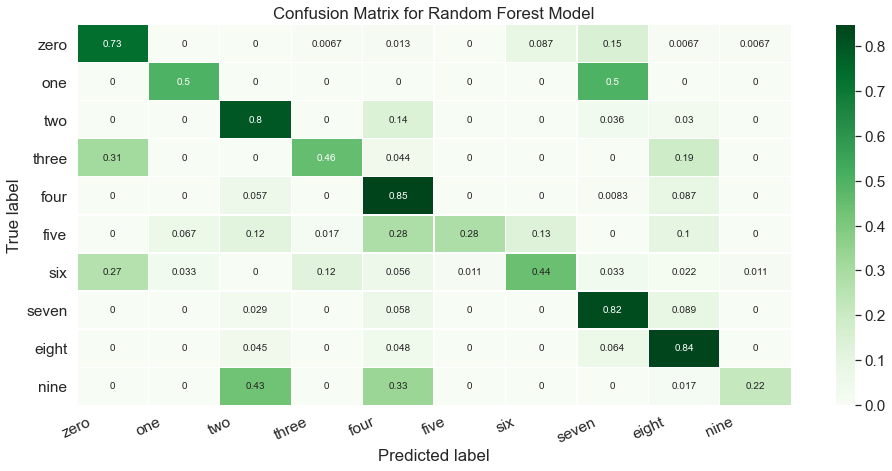



200


Confusion Matrix
[[ 530    0    1    1    6    0    1    1    0    0]
 [   1  204    0    1    1    1    0    0    2    0]
 [   0    0 1958    0   11    0    0    1   10    0]
 [   3    0    0  255    4    0    3    2    3    0]
 [   0    0    9    0 2186    0    0    4   21    0]
 [   0    0    1    0    1  238    0    0    0    0]
 [   1    0    3    0    6    0  346    3    1    0]
 [   0    0    1    0   12    0    0 1378   19    0]
 [   0    0   14    0   14    0    0    7 2215    0]
 [   0    0    2    0   19    0    0    0    1  188]]


              precision    recall  f1-score   support

       eight       0.99      0.98      0.99       540
        five       1.00      0.97      0.99       210
        four       0.98      0.99      0.99      1980
        nine       0.99      0.94      0.97       270
         one       0.97      0.98      0.98      2220
       seven       1.00      0.99      0.99       240
         six       0.99      0.96      0.97       360
       th

<Figure size 432x288 with 0 Axes>

In [214]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    RF_pruned_crossValhigherPrun = RandomForestClassifier(n_estimators = i)
    RF_pruned_crossValhigherPrun.fit(X_train, y_train)

    #setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
    cross_validation_scores_RF_prunedhigherPrun = cross_val_score(RF_pruned_crossValhigherPrun, X_train, y_train, cv=10)

    #train model with 10 fold validation, 
    #cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
    y_pred_RF_pruned_crossValhigherPrun = cross_val_predict(RF_pruned_crossValhigherPrun, X_train, y_train, cv=10)

    #confusion matrix generation
    conf_matrix_RF_pruned_crossValhigherPrun = confusion_matrix(y_train, y_pred_RF_pruned_crossValhigherPrun)
    conf_matrix_RF_pruned_crossValhigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #accuracy report
    classification_report_RF_pruned_crossValhigherPrun = classification_report(y_train, y_pred_RF_pruned_crossValhigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_crossValhigherPrun_2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print("\n")
    print(i)
    print("\n")
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_crossValhigherPrun)
    print("\n")
    print(classification_report_RF_pruned_crossValhigherPrun)
    print("\n")
#Tree topology metrics
#n_nodes_RF_pruned_crossVal = RF_pruned_crossVal.tree_.node_count
#depth_RF_pruned_crossVal = RF_pruned_crossVal.get_depth()
#num_Leaves_RF_pruned_crossVal = RF_pruned_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_crossVal = accuracy_score(y_train, y_pred_RF_pruned_crossVal)*100

#RF_pruned_crossVal_data = [n_nodes_RF_pruned_crossVal, depth_RF_pruned_crossVal, num_Leaves_RF_pruned_crossVal, accuracy_RF_pruned_crossVal]


<h4>Test Data<h4>

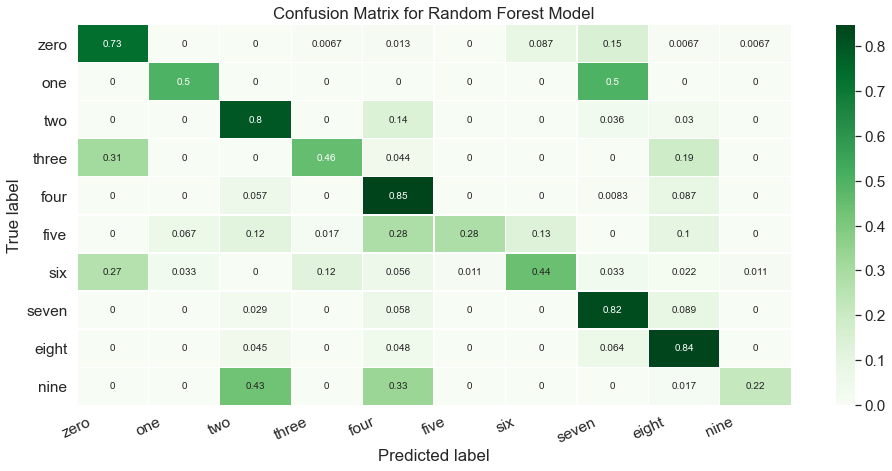



50


Confusion Matrix
[[106   0   0   1   4   0  14  22   2   1]
 [  0  29   0   0   0   0   0  30   1   0]
 [  0   0 509   0  94   0   0  28  29   0]
 [ 38   0   0  40   2   0   0   0  10   0]
 [  0   0  36   0 611   0   0  10  63   0]
 [  0   2  11   2   4  15   9   0  17   0]
 [ 32   0   0   9  14   0  31   2   2   0]
 [  0   0  13   0  31   0   0 353  53   0]
 [  0   0  33   0  42   0   0  50 625   0]
 [  0   0  14   0  43   0   0   0   3   0]]


              precision    recall  f1-score   support

       eight       0.60      0.71      0.65       150
        five       0.94      0.48      0.64        60
        four       0.83      0.77      0.80       660
        nine       0.77      0.44      0.56        90
         one       0.72      0.85      0.78       720
       seven       1.00      0.25      0.40        60
         six       0.57      0.34      0.43        90
       three       0.71      0.78      0.75       450
         two       0.78      0.83      0.80       750
  

/Users/Rob/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 432x288 with 0 Axes>

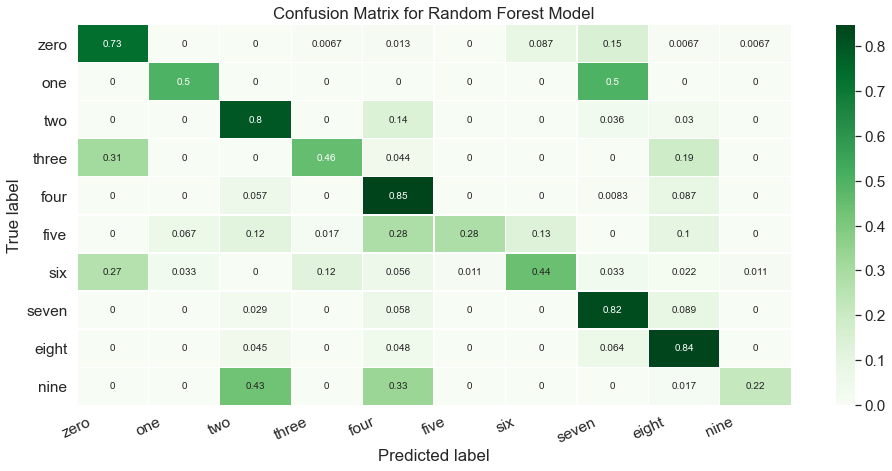



100


Confusion Matrix
[[105   1   0   2   5   0  13  23   1   0]
 [  0  29   1   0   0   0   0  30   0   0]
 [  0   0 523   0  96   0   0  19  22   0]
 [ 28   0   0  41   4   0   0   0  17   0]
 [  0   0  36   0 617   0   0   9  58   0]
 [  0   4   1   3   9  15   6   0  22   0]
 [ 34   0   0   8  14   0  31   2   1   0]
 [  1   0  14   0  23   0   0 366  46   0]
 [  0   0  32   0  48   0   0  57 613   0]
 [  0   0  26   0  33   0   0   0   1   0]]


              precision    recall  f1-score   support

       eight       0.62      0.70      0.66       150
        five       0.85      0.48      0.62        60
        four       0.83      0.79      0.81       660
        nine       0.76      0.46      0.57        90
         one       0.73      0.86      0.79       720
       seven       1.00      0.25      0.40        60
         six       0.62      0.34      0.44        90
       three       0.72      0.81      0.77       450
         two       0.78      0.82      0.80       750
 

<Figure size 432x288 with 0 Axes>

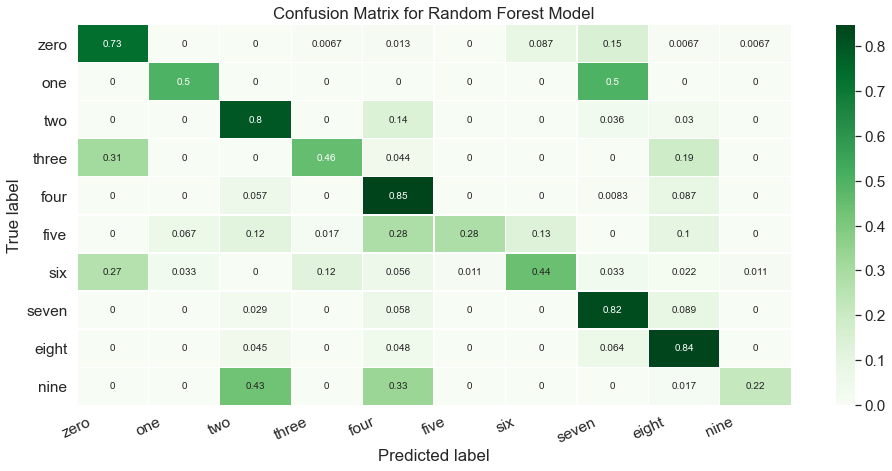



150


Confusion Matrix
[[107   0   0   6   4   0   9  22   2   0]
 [  0  29   0   0   0   0   0  30   1   0]
 [  0   0 521   0  86   0   0  27  26   0]
 [ 35   0   0  40   1   0   0   0  14   0]
 [  0   0  37   0 611   0   0   9  63   0]
 [  0   3   8   4  17  16   4   0   8   0]
 [ 36   0   0   8  13   0  29   2   1   1]
 [  0   0  14   0  23   0   0 362  51   0]
 [  0   0  26   0  47   0   0  57 620   0]
 [  0   0  23   0  30   0   0   0   2   5]]


              precision    recall  f1-score   support

       eight       0.60      0.71      0.65       150
        five       0.91      0.48      0.63        60
        four       0.83      0.79      0.81       660
        nine       0.69      0.44      0.54        90
         one       0.73      0.85      0.79       720
       seven       1.00      0.27      0.42        60
         six       0.69      0.32      0.44        90
       three       0.71      0.80      0.75       450
         two       0.79      0.83      0.81       750
 

<Figure size 432x288 with 0 Axes>

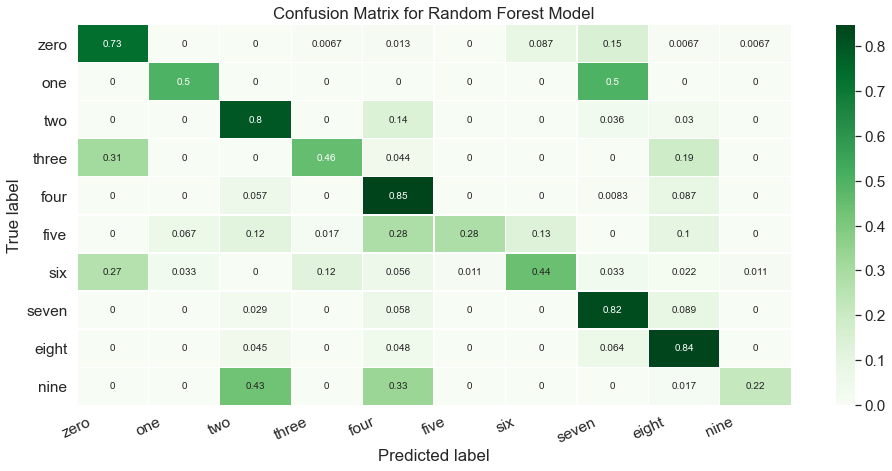



200


Confusion Matrix
[[102   0   0   2   6   0  11  24   5   0]
 [  0  29   1   0   0   0   0  30   0   0]
 [  0   0 510   0  93   0   0  28  29   0]
 [ 37   0   0  41   1   0   0   0  11   0]
 [  0   0  38   0 605   0   0  13  64   0]
 [  0   8  13   4  19  12   1   0   3   0]
 [ 28   0   0  10  15   1  33   2   1   0]
 [  0   0  14   0  30   0   0 362  44   0]
 [  0   0  28   0  43   0   0  57 622   0]
 [  0   0  22   0  35   0   0   0   2   1]]


              precision    recall  f1-score   support

       eight       0.61      0.68      0.64       150
        five       0.78      0.48      0.60        60
        four       0.81      0.77      0.79       660
        nine       0.72      0.46      0.56        90
         one       0.71      0.84      0.77       720
       seven       0.92      0.20      0.33        60
         six       0.73      0.37      0.49        90
       three       0.70      0.80      0.75       450
         two       0.80      0.83      0.81       750
 

<Figure size 432x288 with 0 Axes>

In [215]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_testDatahigherPrun = RandomForestClassifier(ccp_alpha=0.001)

    #fit this model using the test data
    RF_pruned_testDatahigherPrun.fit(X_train, y_train)

    #test this model on the seperated data
    y_pred_RF_pruned_testDatahigherPrun = RF_pruned_testDatahigherPrun.predict(X_test)

    #generate confusion matrix
    conf_matrix_RF_pruned_testDatahigherPrun = confusion_matrix(y_test, y_pred_RF_pruned_testDatahigherPrun)
    conf_matrix_RF_pruned_testDatahigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_testDatahigherPrun = classification_report(y_test, y_pred_RF_pruned_testDatahigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_testDatahigherPrun_2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_testDatahigherPrun)
    print("\n")
    print(classification_report_RF_pruned_testDatahigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_testData = RF_pruned_testData.tree_.node_count
#depth_RF_pruned_testData = RF_pruned_testData.get_depth()
#num_Leaves_RF_pruned_testData = RF_pruned_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_testData = accuracy_score(y_test, y_pred_RF_pruned_testData)*100

#RF_pruned_testData_data = [n_nodes_RF_pruned_testData, depth_RF_pruned_testData, num_Leaves_RF_pruned_testData, accuracy_RF_pruned_testData]


<h4>4000 Split<h4>

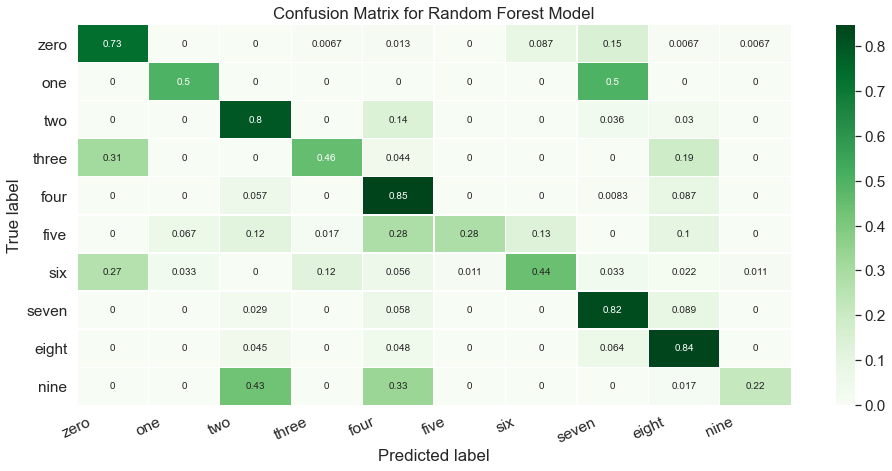



50


Confusion Matrix
[[ 312    1    1    3   10    1   13   19    3    0]
 [   2   94   12    2    1    0    1   27    0    0]
 [   2    0 1289    0  109    0    0   14   32    0]
 [  46    0    0  150    6    1    1    5    3    0]
 [   0    0   55    0 1501    0    0    7   85    0]
 [   4    2   24    2    4  115   11    0    3    0]
 [  31    2    3    9   16    0  171    4    5    0]
 [   0    0   19    0   60    0    0  927   59    0]
 [   0    0   47    0   82    0    0   71 1463    0]
 [   0    0   21    0   45    0    0    0    4   78]]


              precision    recall  f1-score   support

       eight       0.79      0.86      0.82       363
        five       0.95      0.68      0.79       139
        four       0.88      0.89      0.88      1446
        nine       0.90      0.71      0.79       212
         one       0.82      0.91      0.86      1648
       seven       0.98      0.70      0.82       165
         six       0.87      0.71      0.78       241
       thr

<Figure size 432x288 with 0 Axes>

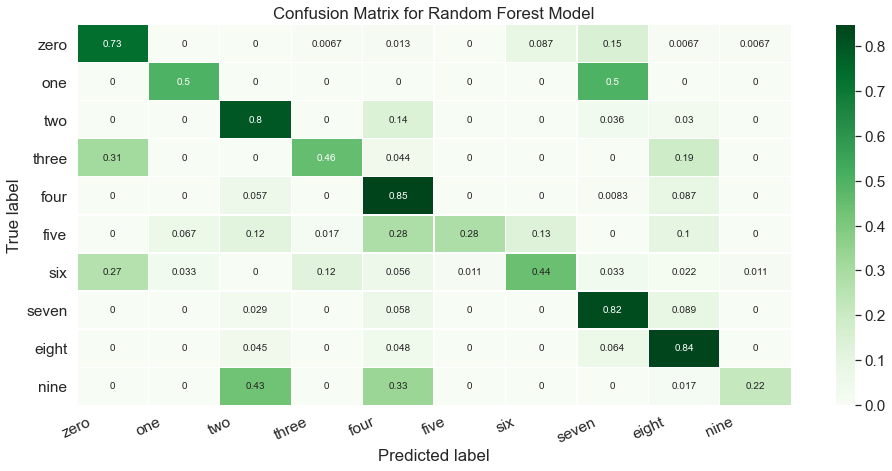



100


Confusion Matrix
[[ 305    1    3    8    9    1   15   17    4    0]
 [   4   93   12    0    1    1    1   25    2    0]
 [   3    0 1274    0  107    0    0   30   32    0]
 [  36    2    1  150    6    0    2    2   13    0]
 [   0    0   53    0 1504    0    0    8   83    0]
 [   2    6   10    6   15  114    4    0    8    0]
 [  29    1    2    7    8    2  182    5    5    0]
 [   0    0   15    0   67    0    1  924   58    0]
 [   2    0   51    0   64    0    0   73 1473    0]
 [   0    0   30    0   45    0    0    0    5   68]]


              precision    recall  f1-score   support

       eight       0.80      0.84      0.82       363
        five       0.90      0.67      0.77       139
        four       0.88      0.88      0.88      1446
        nine       0.88      0.71      0.78       212
         one       0.82      0.91      0.87      1648
       seven       0.97      0.69      0.81       165
         six       0.89      0.76      0.82       241
       th

<Figure size 432x288 with 0 Axes>

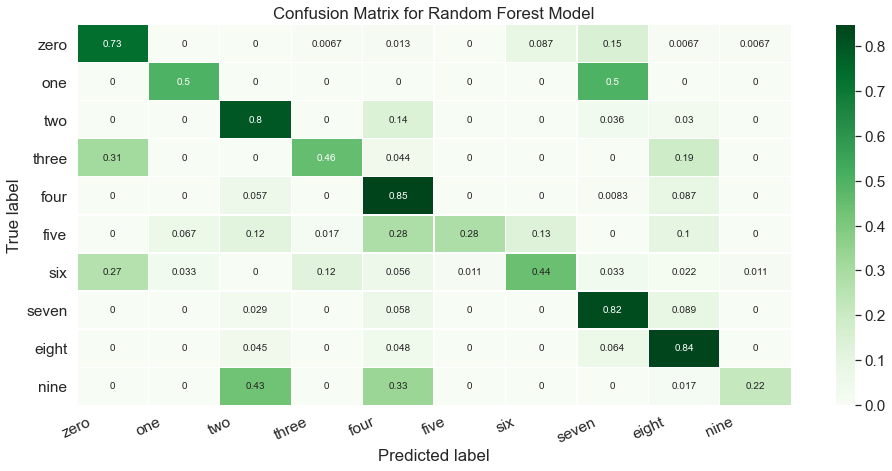



150


Confusion Matrix
[[ 314    0    4    6    7    0    9   19    4    0]
 [   3   93    7    1    1    0    0   33    1    0]
 [   2    0 1280    0  111    0    1   22   30    0]
 [  30    0    1  153    8    1    2    2   15    0]
 [   0    0   54    0 1503    0    0    9   82    0]
 [   3    5   17    3    3  110    8    0   16    0]
 [  30    1    3    9   18    0  176    1    3    0]
 [   0    0   20    0   46    0    1  946   52    0]
 [   0    0   63    0   67    0    0   63 1470    0]
 [   0    0   19    0   55    0    0    0    3   71]]


              precision    recall  f1-score   support

       eight       0.82      0.87      0.84       363
        five       0.94      0.67      0.78       139
        four       0.87      0.89      0.88      1446
        nine       0.89      0.72      0.80       212
         one       0.83      0.91      0.87      1648
       seven       0.99      0.67      0.80       165
         six       0.89      0.73      0.80       241
       th

<Figure size 432x288 with 0 Axes>

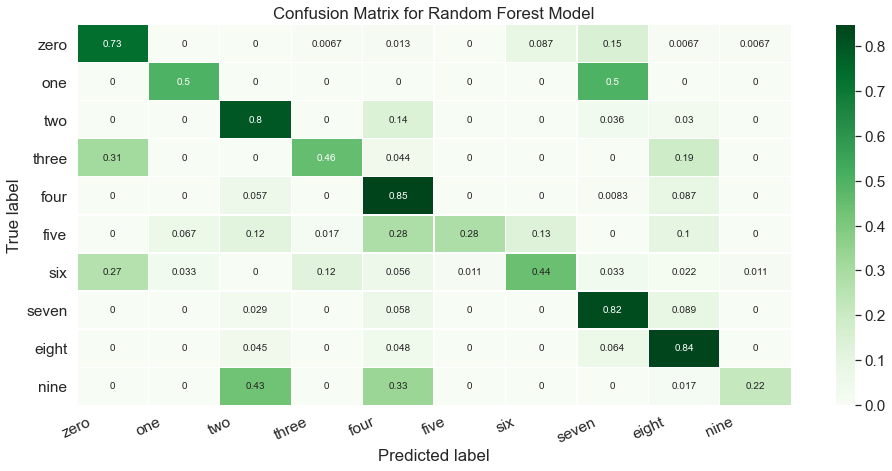



200


Confusion Matrix
[[ 311    1    1    3    3    1   15   16   10    2]
 [   4   94    7    0    0    1    0   31    2    0]
 [   0    0 1307    1   88    0    0   25   25    0]
 [  42    0    0  151    2    0    3    3   11    0]
 [   0    0   47    0 1511    0    0    7   83    0]
 [   3    5    5    1   13  115    7    0   16    0]
 [  25    3    1   12    9    0  180    5    5    1]
 [   1    0   14    0   37    0    0  939   74    0]
 [   0    0   45    0   76    0    0   72 1470    0]
 [   0    0   24    0   52    0    0    0    4   68]]


              precision    recall  f1-score   support

       eight       0.81      0.86      0.83       363
        five       0.91      0.68      0.78       139
        four       0.90      0.90      0.90      1446
        nine       0.90      0.71      0.79       212
         one       0.84      0.92      0.88      1648
       seven       0.98      0.70      0.82       165
         six       0.88      0.75      0.81       241
       th

<Figure size 432x288 with 0 Axes>

In [216]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_4000SplithigherPrun = RandomForestClassifier(n_estimators = 50)

    #fit this model using the test data
    RF_pruned_4000SplithigherPrun.fit(X_train_4000Split, y_train_4000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_4000SplithigherPrun = RF_pruned_4000SplithigherPrun.predict(X_test_4000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_4000SplithigherPrun = confusion_matrix(y_test_4000Split, y_pred_RF_pruned_4000SplithigherPrun)
    conf_matrix_RF_pruned_4000SplithigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_4000SplithigherPrun = classification_report(y_test_4000Split, y_pred_RF_pruned_4000SplithigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_4000SplithigherPrun_2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_4000SplithigherPrun)
    print("\n")
    print(classification_report_RF_pruned_4000SplithigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_4000Split = RF_pruned_4000Split.tree_.node_count
#depth_RF_pruned_4000Split = RF_pruned_4000Split.get_depth()
#num_Leaves_RF_pruned_4000Split = RF_pruned_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_pruned_4000Split)*100

#RF_pruned_4000Split_data = [n_nodes_RF_pruned_4000Split, depth_RF_pruned_4000Split, num_Leaves_RF_pruned_4000Split, accuracy_RF_pruned_4000Split]


<h4>9000 Split<h4>

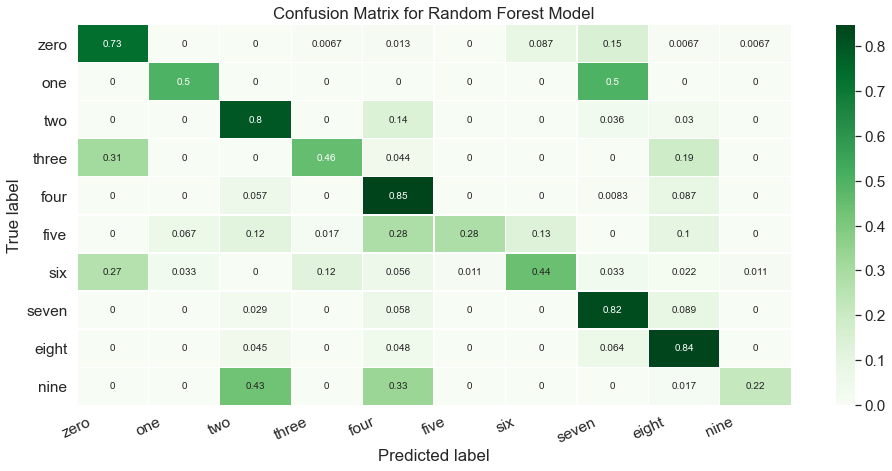



50


Confusion Matrix
[[ 442   16   44   22   25    2   19   44   32    0]
 [  44   98   58   19   14    1    3    0   15    0]
 [   3    0 1976    1  261    0    1   55  189    0]
 [  42    1    3  211   20    0   14   12   31    0]
 [   0    0  212    0 2092    0    2   54  427    0]
 [  32   10   35   25   42   73   14   14   42    0]
 [  50    6   43   14   12    3  247   26   23    0]
 [   5    0  203    0  147    0   17 1209  187    0]
 [   2    1  283    0  325    0    2  341 1898    0]
 [   0    0   35    0  159    0    0    1   18   41]]


              precision    recall  f1-score   support

       eight       0.71      0.68      0.70       646
        five       0.74      0.39      0.51       252
        four       0.68      0.79      0.73      2486
        nine       0.72      0.63      0.67       334
         one       0.68      0.75      0.71      2787
       seven       0.92      0.25      0.40       287
         six       0.77      0.58      0.66       424
       thr

<Figure size 432x288 with 0 Axes>

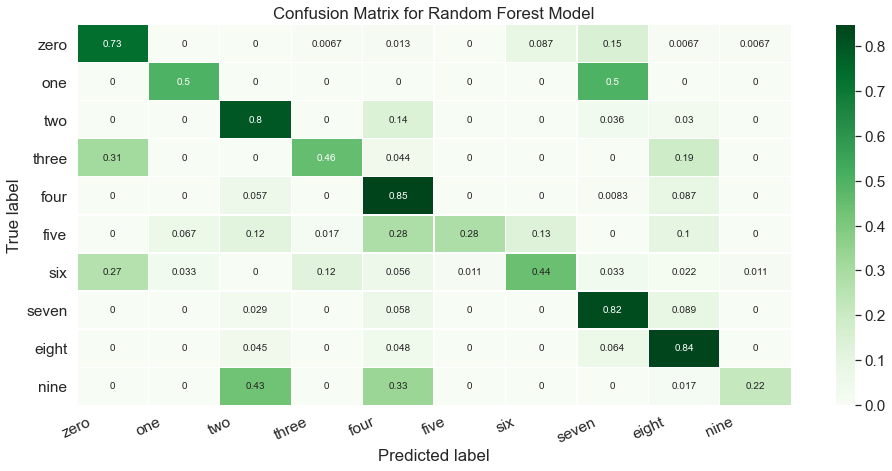



100


Confusion Matrix
[[ 431   13   40   33   26    0   13   47   43    0]
 [  46   95   60   21   16    0    0    1   13    0]
 [   3    1 1943    2  282    0    0   96  159    0]
 [  56    1    2  208   15    0    8   11   33    0]
 [   2    0  218    0 2135    0    3   61  367    1]
 [  56    3   28   30   30   69   24   10   37    0]
 [  47    8   55   14   26    1  218   42   13    0]
 [   3    1  210    0  136    0    6 1213  199    0]
 [   3    0  288    0  305    0    1  370 1885    0]
 [   0    0   37    0  148    0    0    1    8   60]]


              precision    recall  f1-score   support

       eight       0.67      0.67      0.67       646
        five       0.78      0.38      0.51       252
        four       0.67      0.78      0.72      2486
        nine       0.68      0.62      0.65       334
         one       0.68      0.77      0.72      2787
       seven       0.99      0.24      0.39       287
         six       0.80      0.51      0.63       424
       th

<Figure size 432x288 with 0 Axes>

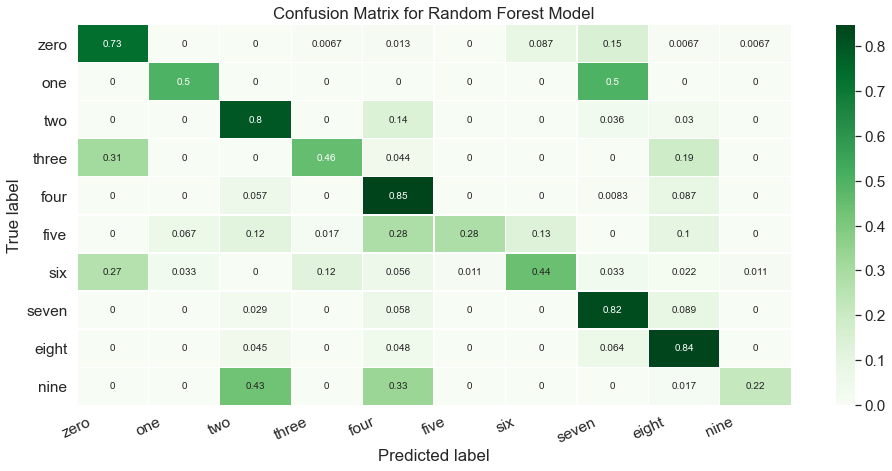



150


Confusion Matrix
[[ 449    5   23   38   31    1   15   68   16    0]
 [  33   99   59   25   16    2    0    1   17    0]
 [   3    0 1848    0  305    0    3   87  240    0]
 [  45    2    6  212   19    0   15   12   23    0]
 [   3    0  175    0 2114    0    0   64  431    0]
 [  44   15   24   24   35   79   24   16   26    0]
 [  50   10   39   16   28    1  211   54   14    1]
 [   9    0  192    2  141    0   14 1246  164    0]
 [   8    0  261    0  304    0   10  392 1877    0]
 [   0    0   31    0  160    0    0    1   11   51]]


              precision    recall  f1-score   support

       eight       0.70      0.70      0.70       646
        five       0.76      0.39      0.52       252
        four       0.70      0.74      0.72      2486
        nine       0.67      0.63      0.65       334
         one       0.67      0.76      0.71      2787
       seven       0.95      0.28      0.43       287
         six       0.72      0.50      0.59       424
       th

<Figure size 432x288 with 0 Axes>

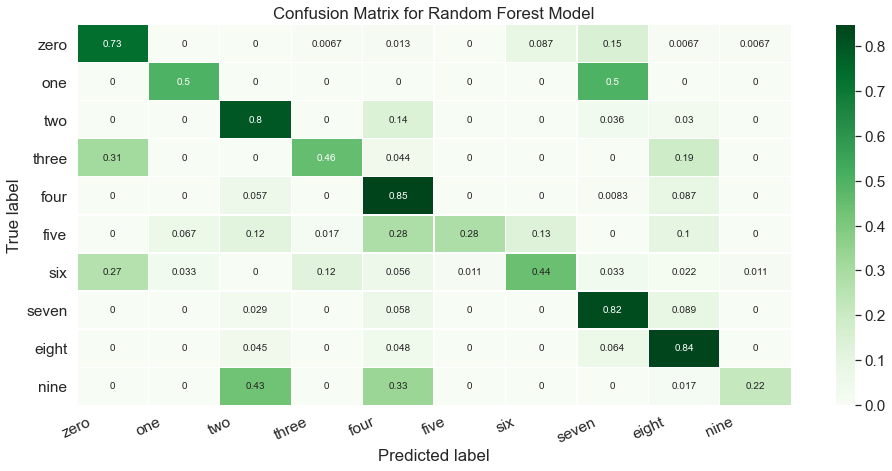



200


Confusion Matrix
[[ 454    3   36   42   23    0   20   41   27    0]
 [  49   95   60   12    9    1    4    0   22    0]
 [   5    2 1919    0  285    0    0   88  187    0]
 [  51    2    4  207   19    0   13   10   28    0]
 [  20    0  185    0 2120    0    2   69  391    0]
 [  62   10   33   24   26   72   28    6   26    0]
 [  64   16   46    9   24    2  214   42    7    0]
 [   7    0  211    0  153    0   19 1209  169    0]
 [   6    0  263    0  335    0    3  373 1872    0]
 [   1    0   34    0  139    0    0    6   20   54]]


              precision    recall  f1-score   support

       eight       0.63      0.70      0.67       646
        five       0.74      0.38      0.50       252
        four       0.69      0.77      0.73      2486
        nine       0.70      0.62      0.66       334
         one       0.68      0.76      0.72      2787
       seven       0.96      0.25      0.40       287
         six       0.71      0.50      0.59       424
       th

<Figure size 432x288 with 0 Axes>

In [217]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_9000SplithigherPrun = RandomForestClassifier(n_estimators = 50)

    #fit this model using the test data
    RF_pruned_9000SplithigherPrun.fit(X_train_9000Split, y_train_9000Split)

    #test this model on the seperated data
    y_pred_RF_pruned_9000SplithigherPrun = RF_pruned_9000SplithigherPrun.predict(X_test_9000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_9000SplithigherPrun = confusion_matrix(y_test_9000Split, y_pred_RF_pruned_9000SplithigherPrun)
    conf_matrix_RF_pruned_9000SplithigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_9000SplithigherPrun = classification_report(y_test_9000Split, y_pred_RF_pruned_9000SplithigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_9000SplithigherPrun_2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_9000SplithigherPrun)
    print("\n")
    print(classification_report_RF_pruned_9000SplithigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_9000Split = RF_pruned_9000Split.tree_.node_count
#depth_RF_pruned_9000Split = RF_pruned_9000Split.get_depth()
#num_Leaves_RF_pruned_9000Split = RF_pruned_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_pruned_9000Split)*100

#RF_pruned_9000Split_data = [n_nodes_RF_pruned_9000Split, depth_RF_pruned_9000Split, num_Leaves_RF_pruned_9000Split, accuracy_RF_pruned_9000Split]


Exploratory

In [218]:
nEstimator_values = [50, 100, 150, 200]

for i in nEstimator_values:

    #define the model to be used 
    RF_pruned_ExplorehigherPrun = RandomForestClassifier(n_estimators = 50)

    #fit this model using the test data
    RF_pruned_ExplorehigherPrun.fit(X_train_Explore, y_train_Explore)

    #test this model on the seperated data
    y_pred_RF_pruned_ExplorehigherPrun = RF_pruned_ExplorehigherPrun.predict(X_test_9000Split)

    #generate confusion matrix
    conf_matrix_RF_pruned_ExplorehigherPrun = confusion_matrix(y_test_9000Split, y_pred_RF_pruned_ExplorehigherPrun)
    conf_matrix_RF_pruned_ExplorehigherPrun_2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    #generate classification report
    classification_report_RF_pruned_ExplorehigherPrun = classification_report(y_test_9000Split, y_pred_RF_pruned_ExplorehigherPrun)

    # Build the plot
    plt.figure(figsize=(16,7))
    sns.set(font_scale=1.4)
    sns.heatmap(conf_matrix_RF_pruned_ExplorehigherPrun_2, annot=True, annot_kws={'size':10},
                cmap=plt.cm.Greens, linewidths=0.2)

    # Add labels to the plot
    class_names = ['zero','one', 'two', 'three', 
                   'four', 'five', 'six',    
                   'seven','eight','nine']
    tick_marks = np.arange(len(class_names))
    tick_marks2 = tick_marks + 0.5
    plt.xticks(tick_marks, class_names, rotation=25)
    plt.yticks(tick_marks2, class_names, rotation=0)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix for Random Forest Model')
    plt.show()
    plt.clf()
    
    print('\n')
    print(i)
    print('\n')
    #Print Confusion matrix and other important results
    print("Confusion Matrix")
    print(conf_matrix_RF_pruned_ExplorehigherPrun)
    print("\n")
    print(classification_report_RF_ExplorehigherPrun)
    print('\n')
#Tree topology metrics
#n_nodes_RF_pruned_Explore = RF_pruned_Explore.tree_.node_count
#depth_RF_pruned_Explore = RF_pruned_Explore.get_depth()
#num_Leaves_RF_pruned_Explore = RF_pruned_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_pruned_Explore = accuracy_score(y_test_Explore, y_pred_RF_pruned_Explore)*100

#RF_pruned_Explore_data = [n_nodes_RF_pruned_Explore, depth_RF_pruned_Explore, num_Leaves_RF_pruned_Explore, accuracy_RF_pruned_9000Split]


ValueError: Number of features of the model must match the input. Model n_features is 119 and input n_features is 2304 

<h4> Gini vs Entropy <h4>

Decision tree classifier allows for use of two strategies for attribute selectioon, entropy and gini. 
“gini” = Gini index
“entropy” = information gain.

part 1  - crossValidation

In [ ]:
RF_entropy_crossVal = RandomForestClassifier(criterion="entropy")
RF_entropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_RF_entropy = cross_val_score(RF_entropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_entropy_crossVal = cross_val_predict(RF_entropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_entropy_crossVal = confusion_matrix(y_train, y_pred_RF_entropy_crossVal)
conf_matrix_RF_entropy_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_entropy_crossVal = classification_report(y_train, y_pred_RF_entropy_crossVal)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_entropy_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_entropy_crossVal = RF_entropy_crossVal.tree_.node_count
#depth_RF_entropy_crossVal = RF_entropy_crossVal.get_depth()
#num_Leaves_RF_entropy_crossVal = RF_entropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_crossVal = accuracy_score(y_train, y_pred_RF_entropy_crossVal)*100

#RF_entropy_crossVal_data = [n_nodes_RF_entropy_crossVal, depth_RF_entropy_crossVal, num_Leaves_RF_entropy_crossVal, accuracy_RF_entropy_crossVal]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_crossVal)

print("\n")
print(classification_report_RF_entropy_crossVal)

part 2 - Test Data 

In [ ]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_entropy_testData = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_entropy_testData = RF_entropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_entropy_testData = confusion_matrix(y_test, y_pred_RF_entropy_testData)
conf_matrix_RF_entropy_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_entropy_testData = classification_report(y_test, y_pred_RF_entropy_testData)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_entropy_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_entropy_testData = RF_entropy_testData.tree_.node_count
#depth_RF_entropy_testData = RF_entropy_testData.get_depth()
#num_Leaves_RF_entropy_testData = RF_entropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_testData = accuracy_score(y_test, y_pred_RF_entropy_testData)*100

#RF_entropy_testData_data = [n_nodes_RF_entropy_testData, depth_RF_entropy_testData, num_Leaves_RF_entropy_testData, accuracy_RF_entropy_testData]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_testData)
print("\n")
print(classification_report_RF_entropy_testData)

part 3 - 4000 Split 

In [ ]:
#define the model to be used 
RF_entropy_4000Split = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_entropy_4000Split = RF_entropy_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_entropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_entropy_4000Split)
conf_matrix_RF_entropy_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_entropy_4000Split = classification_report(y_test_4000Split, y_pred_RF_entropy_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_entropy_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_entropy_4000Split = RF_entropy_4000Split.tree_.node_count
#depth_RF_entropy_4000Split = RF_entropy_4000Split.get_depth()
#num_Leaves_RF_entropy_4000Split = RF_entropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_entropy_4000Split)*100

#RF_entropy_4000Split_data = [n_nodes_RF_entropy_4000Split, depth_RF_entropy_4000Split, num_Leaves_RF_entropy_4000Split, accuracy_RF_entropy_4000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_4000Split)
print("\n")
print(classification_report_RF_entropy_4000Split)

part 4 - 9000 Split

In [ ]:
#define the model to be used 
RF_entropy_9000Split = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_entropy_9000Split = RF_entropy_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_entropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_entropy_9000Split)
conf_matrix_RF_entropy_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_entropy_9000Split = classification_report(y_test_9000Split, y_pred_RF_entropy_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_entropy_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_entropy_9000Split = RF_entropy_9000Split.tree_.node_count
#depth_RF_entropy_9000Split = RF_entropy_9000Split.get_depth()
#num_Leaves_RF_entropy_9000Split = RF_entropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_entropy_9000Split)*100

#RF_entropy_9000Split_data = [n_nodes_RF_entropy_9000Split, depth_RF_entropy_9000Split, num_Leaves_RF_entropy_9000Split, accuracy_RF_entropy_9000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_9000Split)
print("\n")
print(classification_report_RF_entropy_9000Split)

Exploratory

In [ ]:
#define the model to be used 
RF_entropy_Explore = RandomForestClassifier(criterion="entropy")

#fit this model using the test data
RF_entropy_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_entropy_Explore = RF_entropy_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_entropy_Explore = confusion_matrix(y_test_9000Split, y_pred_RF_entropy_Explore)
conf_matrix_RF_entropy_Explore = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_entropy_Explore = classification_report(y_test_9000Split, y_pred_RF_entropy_Explore)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_entropy_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_entropy_Explore = RF_entropy_Explore.tree_.node_count
#depth_RF_entropy_Explore = RF_entropy_Explore.get_depth()
#num_Leaves_RF_entropy_Explore = RF_entropy_Exploret.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_entropy_Explore = accuracy_score(y_test_Explore, y_pred_RF_entropy_Explore)*100

#RF_entropy_9000Split_data = [n_nodes_RF_entropy_Explore, depth_RF_entropy_Explore, num_Leaves_RF_entropy_Explore, accuracy_RF_entropy_Explore]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_entropy_9000Split)
print("\n")
print(classification_report_RF_entropy_9000Split)

In [ ]:
#infoFrames3 = [RF_entropy_crossVal_data, RF_entropy_testData_data, RF_entropy_4000Split_data, RF_entropy_9000Split_data]

#RF_Table_Entropy = pd.DataFrame(infoFrames3, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_Entropy

<h4> minimal number of instances permissible per leaf <h4>

RF with crossVal minimum 5 instances per leaf

In [ ]:
RF_minInstances5_crossVal = RandomForestClassifier(min_samples_leaf = 5)
RF_minInstances5_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_minInstances5_crossVal = cross_val_predict(RF_minInstances5_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_minInstances5_crossVal = confusion_matrix(y_train, y_pred_RF_minInstances5_crossVal)
conf_matrix_RF_minInstances5_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_minInstances5_crossVal = classification_report(y_train, y_pred_RF_minInstances5_crossVal)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances5_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_minInstances5_crossVal = RF_minInstances5_crossVal.tree_.node_count
#depth_RF_minInstances5_crossVal = RF_minInstances5_crossVal.get_depth()
#num_Leaves_RF_minInstances5_crossVal = RF_minInstances5_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_crossVal = accuracy_score(y_train, y_pred_RF_minInstances5_crossVal)*100

#RF_minInstances5_crossVal_data = [n_nodes_RF_minInstances5_crossVal, depth_RF_minInstances5_crossVal, num_Leaves_RF_minInstances5_crossVal, accuracy_RF_minInstances5_crossVal]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_crossVal)

print("\n")
print(classification_report_RF_minInstances5_crossVal)
#print(roc_auc_score(y, y_pred))
print("\n")

RF with crossVal minimum 2 instances per leaf

In [ ]:
RF_minInstances2_crossVal = RandomForestClassifier(min_samples_leaf = 2)
RF_minInstances2_crossVal.fit(X_train, y_train)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_minInstances2_crossVal = cross_val_predict(RF_minInstances2_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_minInstances2_crossVal = confusion_matrix(y_train, y_pred_RF_minInstances2_crossVal)
conf_matrix_RF_minInstances2_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_minInstances2_crossVal = classification_report(y_train, y_pred_RF_minInstances2_crossVal)


# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances2_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances2_crossVal = RF_minInstances2_crossVal.tree_.node_count
#depth_RF_minInstances2_crossVal = RF_minInstances2_crossVal.get_depth()
#num_Leaves_RF_minInstances2_crossVal = RF_minInstances2_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_crossVal = accuracy_score(y_train, y_pred_RF_minInstances2_crossVal)*100

#RF_minInstances2_crossVal_data = [n_nodes_RF_minInstances2_crossVal, depth_RF_minInstances2_crossVal, num_Leaves_RF_minInstances2_crossVal, accuracy_RF_minInstances2_crossVal]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_crossVal)

print("\n")
print(classification_report_RF_minInstances2_crossVal)

In [ ]:
#infoFrames4 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data]

#RF_Table_minInstances_crossVal = pd.DataFrame(infoFrames4, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5'])

#RF_Table_minInstances_crossVal

part 2 - Test Data

RF with test data min samples per leaf = 5 

In [ ]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_minInstances5_testData = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_minInstances5_testData = RF_minInstances5_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_minInstances5_testData = confusion_matrix(y_test, y_pred_RF_minInstances5_testData)
conf_matrix_RF_minInstances5_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances5_testData = classification_report(y_test, y_pred_RF_minInstances5_testData)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances5_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()
#Tree topology metrics
#n_nodes_RF_minInstances5_testData = RF_minInstances5_testData.tree_.node_count
#depth_RF_minInstances5_testData = RF_minInstances5_testData.get_depth()
#num_Leaves_RF_minInstances5_testData = RF_minInstances5_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_testData = accuracy_score(y_test, y_pred_RF_minInstances5_testData)*100

#RF_minInstances5_testData_data = [n_nodes_RF_minInstances5_testData, depth_RF_minInstances5_testData, num_Leaves_RF_minInstances5_testData, accuracy_RF_minInstances5_testData]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_testData)

print("\n")
print(classification_report_RF_minInstances5_testData)

RF with test data min samples per leaf = 2 

In [ ]:
#Define model, with the splitting criterion set to entropy. Default is Gini 
RF_minInstances2_testData = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_minInstances2_testData = RF_minInstances2_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_minInstances2_testData = confusion_matrix(y_test, y_pred_RF_minInstances2_testData)
conf_matrix_RF_minInstances2_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances2_testData = classification_report(y_test, y_pred_RF_minInstances2_testData)
conf_matrix_RF_minInstances2_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances2_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances2_testData = RF_minInstances2_testData.tree_.node_count
#depth_RF_minInstances2_testData = RF_minInstances2_testData.get_depth()
#num_Leaves_RF_minInstances2_testData = RF_minInstances2_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_testData = accuracy_score(y_test, y_pred_RF_minInstances2_testData)*100

#RF_minInstances2_testData_data = [n_nodes_RF_minInstances2_testData, depth_RF_minInstances2_testData, num_Leaves_RF_minInstances2_testData, accuracy_RF_minInstances2_testData]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_testData)

print("\n")
print(classification_report_RF_minInstances2_testData)

In [ ]:
#infoFrames5 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data,RF_withTestData_data,RF_minInstances2_testData_data,RF_minInstances5_testData_data ]

#RF_Table_minInstances_crossVal_test = pd.DataFrame(infoFrames5, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal Min 1','crossVal Min 2','crossVal Min 5', 'testData 1' ,'testData 2','testData 5'])

#RF_Table_minInstances_crossVal_test

RF with 4000 split data using min samples per leaf at 5

In [ ]:
#define the model to be used 
RF_minInstances5_4000Split = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_minInstances5_4000Split = RF_minInstances5_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_minInstances5_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_minInstances5_4000Split)
conf_matrix_RF_minInstances5_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances5_4000Split = classification_report(y_test_4000Split, y_pred_RF_minInstances5_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances5_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances5_4000Split = RF_minInstances5_4000Split.tree_.node_count
#depth_RF_minInstances5_4000Split = RF_minInstances5_4000Split.get_depth()
#num_Leaves_RF_minInstances5_4000Split = RF_minInstances5_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_minInstances5_4000Split)*100

#RF_minInstances5_4000Split_data = [n_nodes_RF_minInstances5_4000Split, depth_RF_minInstances5_4000Split, num_Leaves_RF_minInstances5_4000Split, accuracy_RF_minInstances5_4000Split]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_4000Split)
print("\n")
print(classification_report_RF_minInstances5_4000Split)

RF with 4000 split data using min samples per leaf at 2

In [ ]:
#define the model to be used 
RF_minInstances2_4000Split = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_minInstances2_4000Split = RF_minInstances2_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_minInstances2_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_minInstances2_4000Split)
conf_matrix_RF_minInstances2_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances2_4000Split = classification_report(y_test_4000Split, y_pred_RF_minInstances2_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances2_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances2_4000Split = RF_minInstances2_4000Split.tree_.node_count
#depth_RF_minInstances2_4000Split = RF_minInstances2_4000Split.get_depth()
#num_Leaves_RF_minInstances2_4000Split = RF_minInstances2_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_minInstances2_4000Split)*100

#RF_minInstances2_4000Split_data = [n_nodes_RF_minInstances2_4000Split, depth_RF_minInstances2_4000Split, num_Leaves_RF_minInstances2_4000Split, accuracy_RF_minInstances2_4000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_4000Split)
print("\n")
print(classification_report_RF_minInstances2_4000Split)

9000 Split

In [ ]:
#define the model to be used 
RF_minInstances5_9000Split = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_minInstances5_9000Split = RF_minInstances5_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_minInstances5_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_minInstances5_9000Split)
conf_matrix_RF_minInstances5_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances5_9000Split = classification_report(y_test_4000Split, y_pred_RF_minInstances5_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances5_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances5_9000Split = RF_minInstances5_4000Split.tree_.node_count
#depth_RF_minInstances5_9000Split = RF_minInstances5_9000Split.get_depth()
#num_Leaves_RF_minInstances5_9000Split = RF_minInstances5_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_minInstances5_9000Split)*100

#RF_minInstances5_9000Split_data = [n_nodes_RF_minInstances5_9000Split, depth_RF_minInstances5_9000Split, num_Leaves_RF_minInstances5_9000Split, accuracy_RF_minInstances5_9000Split]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_9000Split)
print("\n")
print(classification_report_RF_minInstances5_9000Split)

In [ ]:
#define the model to be used 
RF_minInstances2_9000Split = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_minInstances2_9000Split = RF_minInstances2_9000Split.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_minInstances2_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_minInstances2_9000Split)
conf_matrix_RF_minInstances2_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances2_9000Split = classification_report(y_test_9000Split, y_pred_RF_minInstances2_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances2_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances2_9000Split = RF_minInstances2_9000Split.tree_.node_count
#depth_RF_minInstances2_9000Split = RF_minInstances2_9000Split.get_depth()
#num_Leaves_RF_minInstances2_9000Split = RF_minInstances2_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_minInstances2_9000Split)*100

#RF_minInstances2_9000Split_data = [n_nodes_RF_minInstances2_9000Split, depth_RF_minInstances2_9000Split, num_Leaves_RF_minInstances2_9000Split, accuracy_RF_minInstances2_9000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_9000Split)
print("\n")
print(classification_report_RF_minInstances2_9000Split)

Exploratory

In [ ]:
#define the model to be used 
RF_minInstances5_Explore = RandomForestClassifier(min_samples_leaf = 5)

#fit this model using the test data
RF_minInstances5_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_minInstances5_Explore = RF_minInstances5_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_minInstances5_Explore = confusion_matrix(y_test_Explore, y_pred_RF_minInstances5_Explore)
conf_matrix_RF_minInstances5_Explore2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances5_Explore = classification_report(y_test_Explore, y_pred_RF_minInstances5_Explore)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances5_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances5_Explore = RF_minInstances5_Explore.tree_.node_count
#depth_RF_minInstances5_Explore = RF_minInstances5_Explore.get_depth()
#num_Leaves_RF_minInstances5_Explore = RF_minInstances5_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances5_Explore = accuracy_score(y_test_Explore, y_pred_RF_minInstances5_Explore)*100

#RF_minInstances5_Explore_data = [n_nodes_RF_minInstances5_Explore, depth_RF_minInstances5_Explore, num_Leaves_RF_minInstances5_Explore, accuracy_RF_minInstances5_Explore]

In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances5_Explore)
print("\n")
print(classification_report_RF_minInstances5_Explore)

In [ ]:
#define the model to be used 
RF_minInstances2_Explore = RandomForestClassifier(min_samples_leaf = 2)

#fit this model using the test data
RF_minInstances2_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_minInstances2_Explore = RF_minInstances2_Explore.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_minInstances2_Explore = confusion_matrix(y_test_Explore, y_pred_RF_minInstances2_Explore)
conf_matrix_RF_minInstances2_Explore2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_minInstances2_Explore = classification_report(y_test_Explore, y_pred_RF_minInstances2_Explore)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_minInstances2_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_minInstances2_Explore = RF_minInstances2_Explore.tree_.node_count
#depth_RF_minInstances2_Explore = RF_minInstances2_Explore.get_depth()
#num_Leaves_RF_minInstances2_Explore = RF_minInstances2_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_minInstances2_Explore = accuracy_score(y_test_Explore, y_pred_RF_minInstances2_Explore)*100

#RF_minInstances2_Explore_data = [n_nodes_RF_minInstances2_Explore, depth_RF_minInstances2_Explore, num_Leaves_RF_minInstances2_Explore, accuracy_RF_minInstances2_Explore]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_minInstances2_Explore)
print("\n")
print(classification_report_RF_minInstances2_Explore)

In [ ]:
#infoFrames6 = [RF_crossVal_data,RF_minInstances2_crossVal_data, RF_minInstances5_crossVal_data,RF_withTestData_data,RF_minInstances2_testData_data,RF_minInstances5_testData_data, RF_4000Split_data, RF_minInstances2_4000Split_data, RF_minInstances5_4000Split_data ]

#RF_Table_minInstances = pd.DataFrame(infoFrames6, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['crossVal 1','crossVal 2','crossVal 5', 'testData 1' ,'testData 2','testData 5','4000Split 1','4000Split 2','4000Split 5'])

#RF_Table_minInstances

<h3> Entropy & Pruning <h3> 

RF trained with cross validation, using both pruning and entropy 

In [ ]:
RF_prunedEntropy_crossVal = RandomForestClassifier(ccp_alpha= 0.001, criterion="entropy")
RF_prunedEntropy_crossVal.fit(X_train, y_train)

#setup cross validation using the above classifier, X_train = data to be classified, y = the labels, CV = number of folds
cross_validation_scores_RF_prunedEntropy = cross_val_score(RF_prunedEntropy_crossVal, X_train, y_train, cv=10)

#train model with 10 fold validation, 
#cross_val_predict Get predictions from each split of cross-validation for diagnostic purposes.
y_pred_RF_prunedEntropy_crossVal = cross_val_predict(RF_prunedEntropy_crossVal, X_train, y_train, cv=10)

#confusion matrix generation
conf_matrix_RF_prunedEntropy_crossVal = confusion_matrix(y_train, y_pred_RF_prunedEntropy_crossVal)
conf_matrix_RF_prunedEntropy_crossVal2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#accuracy report
classification_report_RF_prunedEntropy_crossVal = classification_report(y_train, y_pred_RF_prunedEntropy_crossVal)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_prunedEntropy_crossVal2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_prunedEntropy_crossVal = RF_prunedEntropy_crossVal.tree_.node_count
#depth_RF_prunedEntropy_crossVal = RF_prunedEntropy_crossVal.get_depth()
#num_Leaves_RF_prunedEntropy_crossVal = RF_prunedEntropy_crossVal.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_prunedEntropy_crossVal = accuracy_score(y_train, y_pred_RF_prunedEntropy_crossVal)*100

#RF_prunedEntropy_crossVal_data = [n_nodes_RF_prunedEntropy_crossVal, depth_RF_prunedEntropy_crossVal, num_Leaves_RF_prunedEntropy_crossVal, accuracy_RF_prunedEntropy_crossVal]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_prunedEntropy_crossVal)
print("\n")
print(classification_report_RF_pruned_crossVal)

RF trained with the testData, using both pruning and entropy 

In [ ]:
#define the model to be used 
RF_prunedEntropy_testData = RandomForestClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
RF_prunedEntropy_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_prunedEntropy_testData = RF_prunedEntropy_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_prunedEntropy_testData = confusion_matrix(y_test, y_pred_RF_prunedEntropy_testData)
conf_matrix_RF_prunedEntropy_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_prunedEntropy_testData = classification_report(y_test, y_pred_RF_prunedEntropy_testData)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_prunedEntropy_testData2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_prunedEntropy_testData = RF_prunedEntropy_testData.tree_.node_count
#depth_RF_prunedEntropy_testData = RF_prunedEntropy_testData.get_depth()
#num_Leaves_RF_prunedEntropy_testData = RF_prunedEntropy_testData.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_prunedEntropy_testData = accuracy_score(y_test, y_pred_RF_prunedEntropy_testData)*100

#RF_prunedEntropy_testData_data = [n_nodes_RF_prunedEntropy_testData, depth_RF_prunedEntropy_testData, num_Leaves_RF_prunedEntropy_testData, accuracy_RF_prunedEntropy_testData]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_prunedEntropy_testData)
print("\n")
print(classification_report_RF_prunedEntropy_testData)

RF trained with the 4000 split data, using both pruning and entropy 

In [ ]:
#define the model to be used 
RF_prunedEntropy_4000Split = RandomForestClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
RF_prunedEntropy_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_prunedEntropy_4000Split = RF_prunedEntropy_testData.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_prunedEntropy_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_prunedEntropy_4000Split)
conf_matrix_RF_prunedEntropy_4000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_prunedEntropy_4000Split = classification_report(y_test_4000Split, y_pred_RF_prunedEntropy_4000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_prunedEntropy_4000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_prunedEntropy_4000Split = RF_prunedEntropy_4000Split.tree_.node_count
#depth_RF_prunedEntropy_4000Split = RF_prunedEntropy_4000Split.get_depth()
#num_Leaves_RF_prunedEntropy_4000Split = RF_prunedEntropy_4000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_prunedEntropy_4000Split = accuracy_score(y_test_4000Split, y_pred_RF_prunedEntropy_4000Split)*100

#RF_prunedEntropy_4000Split_data = [n_nodes_RF_prunedEntropy_4000Split, depth_RF_prunedEntropy_4000Split, num_Leaves_RF_prunedEntropy_4000Split, accuracy_RF_prunedEntropy_4000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_prunedEntropy_4000Split)
print("\n")
print(classification_report_RF_prunedEntropy_4000Split)

RF trained with the 9000 split data, using both pruning and entropy 

In [ ]:
#define the model to be used 
RF_prunedEntropy_9000Split = RandomForestClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
RF_prunedEntropy_9000Split.fit(X_train_9000Split, y_train_9000Split)

#test this model on the seperated data
y_pred_RF_prunedEntropy_9000Split = RF_prunedEntropy_testData.predict(X_test_9000Split)

#generate confusion matrix
conf_matrix_RF_prunedEntropy_9000Split = confusion_matrix(y_test_9000Split, y_pred_RF_prunedEntropy_9000Split)
conf_matrix_RF_prunedEntropy_9000Split2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_prunedEntropy_9000Split = classification_report(y_test_9000Split, y_pred_RF_prunedEntropy_9000Split)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_prunedEntropy_9000Split2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_prunedEntropy_9000Split = RF_prunedEntropy_9000Split.tree_.node_count
#depth_RF_prunedEntropy_9000Split = RF_prunedEntropy_9000Split.get_depth()
#num_Leaves_RF_prunedEntropy_9000Split = RF_prunedEntropy_9000Split.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_prunedEntropy_9000Split = accuracy_score(y_test_9000Split, y_pred_RF_prunedEntropy_9000Split)*100

#RF_prunedEntropy_9000Split_data = [n_nodes_RF_prunedEntropy_9000Split, depth_RF_prunedEntropy_9000Split, num_Leaves_RF_prunedEntropy_9000Split, accuracy_RF_prunedEntropy_9000Split]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_prunedEntropy_9000Split)
print("\n")
print(classification_report_RF_prunedEntropy_9000Split)

Exploratory

In [ ]:
#define the model to be used 
RF_prunedEntropy_Explore = RandomForestClassifier(ccp_alpha= 0.001, criterion="entropy")

#fit this model using the test data
RF_prunedEntropy_Explore.fit(X_train_Explore, y_train_Explore)

#test this model on the seperated data
y_pred_RF_prunedEntropy_Explore = RF_prunedEntropy_testData.predict(X_test_Explore)

#generate confusion matrix
conf_matrix_RF_prunedEntropy_Explore = confusion_matrix(y_test_Explore, y_pred_RF_prunedEntropy_Explore)
conf_matrix_RF_prunedEntropy_Explore2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_prunedEntropy_Explore = classification_report(y_test_Explore, y_pred_RF_prunedEntropy_Explore)

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix_RF_prunedEntropy_Explore2, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['zero','one', 'two', 'three', 
               'four', 'five', 'six',    
               'seven','eight','nine']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()
plt.clf()

#Tree topology metrics
#n_nodes_RF_prunedEntropy_Explore = RF_prunedEntropy_Explore.tree_.node_count
#depth_RF_prunedEntropy_Explore = RF_prunedEntropy_Explore.get_depth()
#num_Leaves_RF_prunedEntropy_Explore = RF_prunedEntropy_Explore.get_n_leaves()

#Find the accuracy of this model based on the test data
#accuracy_RF_prunedEntropy_Explore = accuracy_score(y_test_Explore, y_pred_RF_prunedEntropy_Explore)*100

#RF_prunedEntropy_Explore_data = [n_nodes_RF_prunedEntropy_Explore, depth_RF_prunedEntropy_Explore, num_Leaves_RF_prunedEntropy_Explore, accuracy_RF_prunedEntropy_Explore]


In [ ]:
#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_prunedEntropy_Explore)
print("\n")
print(classification_report_RF_prunedEntropy_Explore)

In [108]:
#infoFrames8 = [RF_prunedEntropy_crossVal_data, RF_prunedEntropy_testData_data, RF_prunedEntropy_4000Split_data, RF_prunedEntropy_9000Split_data]

#RF_Table_prunedEntropy = pd.DataFrame(infoFrames8, columns=["Number of Nodes", "Depth of Tree", "Number of Leaves", "Accuracy" ], index=['Cross Validation','Test Data','4000 Split','9000 Split'])

#RF_Table_prunedEntropy

<h3> RESULTS SECTION RF <h3>

In [ ]:
print('Original RF')
RF_Table

In [ ]:
print('Pruned RF')
RF_Table_pruned

In [ ]:
print('Entropy ')
RF_Table_Entropy

In [ ]:
print('Min sample per leaf')
RF_Table_minInstances

In [ ]:
print('Pruned & Entropy ')
RF_Table_prunedEntropy

In [ ]:
plot_tree(RF_withTestData);

In [ ]:
plot_tree(RF_pruned_testData);

In [ ]:
plot_tree(RF_entropy_testData);

<h3> Grid Search Investigation <h3>

In [226]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [227]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 48.7min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 207.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 386.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [228]:
#Best Params
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [235]:

#define the model to be used 
RF_best_testData = rf_random.best_estimator_

#fit this model using the test data
RF_best_testData.fit(X_train, y_train)

#test this model on the seperated data
y_pred_RF_best_testData = RF_best_testData.predict(X_test)

#generate confusion matrix
conf_matrix_RF_best_testData = confusion_matrix(y_test, y_pred_RF_best_testData)
conf_matrix_RF_best_testData2 = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

#generate classification report
classification_report_RF_best_testData = classification_report(y_test, y_pred_RF_best_testData)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_best_testData)
print("\n")
print(classification_report_RF_best_testData)

Confusion Matrix
[[109   1   0   5   3   0  13  17   2   0]
 [  0  30   0   0   0   0   0  30   0   0]
 [  0   0 530   0  87   0   0  21  22   0]
 [ 40   0   0  41   1   0   0   0   8   0]
 [  0   0  31   0 632   0   0   9  48   0]
 [  0   8   6   0   6  16   8   0  16   0]
 [ 24   0   0  16   6   0  42   1   1   0]
 [  0   0  14   0  17   0   0 367  52   0]
 [  0   0  29   0  31   0   0  33 657   0]
 [  0   0  28   0  19   0   0   0   0  13]]


              precision    recall  f1-score   support

       eight       0.63      0.73      0.67       150
        five       0.77      0.50      0.61        60
        four       0.83      0.80      0.82       660
        nine       0.66      0.46      0.54        90
         one       0.79      0.88      0.83       720
       seven       1.00      0.27      0.42        60
         six       0.67      0.47      0.55        90
       three       0.77      0.82      0.79       450
         two       0.82      0.88      0.84       750
        z

In [236]:
#define the model to be used 
RF_best_4000Split = rf_random.best_estimator_

#fit this model using the test data
RF_best_4000Split.fit(X_train_4000Split, y_train_4000Split)

#test this model on the seperated data
y_pred_RF_best_4000Split = RF_best_4000Split.predict(X_test_4000Split)

#generate confusion matrix
conf_matrix_RF_best_4000Split = confusion_matrix(y_test_4000Split, y_pred_RF_4000Split)

#generate classification report
classification_report_RF_best_4000Split = classification_report(y_test_4000Split, y_pred_RF_best_4000Split)

#Print Confusion matrix and other important results
print("Confusion Matrix")
print(conf_matrix_RF_best_4000Split)
print("\n")
print(classification_report_RF_best_4000Split)


Confusion Matrix
[[ 312    0    2    6    7    0   17   14    5    0]
 [   4   92    9    1    1    0    0   30    2    0]
 [   1    0 1293    0  100    0    0   26   26    0]
 [  42    0    0  152    6    0    3    2    7    0]
 [   0    0   49    0 1503    0    0   11   85    0]
 [   2    3    5    2   11  115   11    0   16    0]
 [  32    0    1    9   11    0  181    2    5    0]
 [   0    0   14    0   36    0    0  954   61    0]
 [   0    0   48    0   54    0    0   55 1506    0]
 [   0    0   18    0   51    0    0    0    4   75]]


              precision    recall  f1-score   support

       eight       0.81      0.87      0.84       363
        five       0.96      0.71      0.81       139
        four       0.91      0.90      0.90      1446
        nine       0.88      0.73      0.80       212
         one       0.86      0.94      0.90      1648
       seven       0.99      0.70      0.82       165
         six       0.86      0.77      0.81       241
       three     